<a href="https://colab.research.google.com/github/frizuma3/21013159_DataAnalytics/blob/main/Assignment_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

School: UHI.

Course: Applied Data Analytics - Data Analytics on the Web.

**DAOTW Collision Assignment.**

Student: Maximilian Nwosu.

Student No.: 21013159

## **INTRODUCTION**

Traffic collisions are a significant public safety concern, particularly in densely populated cities like the New York City (NYC), where thousands of vehicles, pedestrians and cyclists interact daily.
A key factor influencing traffic collisions is weather conditions. Adverse weather, such as rain, snow and extreme temperatures can impair visibility, reduce road traction and increase the likelihood of accidents. Certain days of the week may see more traffic or riskier driving behaviours, such as weekends or rush hours on weekdays. Understanding how these variables (weather and day of the week) impact collision frequency can help emergency services optimise their response strategies, deploy staff more effectively and potentially prevent accidents by raising public awareness during high-risk periods.

## **Getting the Data.**

The premise of the assignment is to understand the relationship between weather and collisions in New York City. To do this we will need combined data from "`uhiproject-434612.assignment_1.collated_collision_data1`" table and from "`uhiproject-434612.assignment_1.weather_2012_to_2020`" table.

Here is the [link](https://console.cloud.google.com/bigquery?p=bigquery-public-data&d=new_york_mv_collisions&page=dataset&project=uhiproject-434612&ws=!1m55!1m4!4m3!1sbigquery-public-data!2snew_york_mv_collisions!3snypd_mv_collisions!1m4!1m3!1suhiproject-434612!2sbquxjob_15e4acb2_1924a18a535!3sUS!1m4!1m3!1suhiproject-434612!2sbquxjob_394128e8_1924a2cc87f!3sUS!1m4!4m3!1suhiproject-434612!2sassignment_1!3scollision_data_count!1m4!1m3!1suhiproject-434612!2sbquxjob_2fd0f639_1924a263b12!3sUS!1m4!1m3!1suhiproject-434612!2sbquxjob_3babb827_1924a395942!3sUS!1m4!1m3!1suhiproject-434612!2sbquxjob_3fc54765_1924a3a31ca!3sUS!1m4!4m3!1suhiproject-434612!2sassignment_1!3sweather_2012_to_2020!1m4!1m3!1suhiproject-434612!2sbquxjob_7145a67d_1926cd8406d!3sUS!1m4!1m3!1suhiproject-434612!2sbquxjob_3d6f7e6b_1926e0f4329!3sUS!1m4!1m3!1suhiproject-434612!2sbquxjob_6335ae55_1926e0eecb7!3sUS&inv=1&invt=AbeOOw) to the BigQuery path for the data.


```
## The SQL select code for the data source from BigQuery:

SELECT * FROM `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`



## SQL CREATE VIEW code from BigQuery data source:

CODE TO CREATE A VIEW FOR EVERY DATE AVAILABLE FROM 2012 TO 2020
CREATE VIEW `uhiproject-434612.assignment_one.weather_2012_to_2023` AS
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2012` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2013` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2014` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2015` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2016` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2017` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2018` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2019` WHERE wban='94728'
union all
SELECT DATE(CAST(year AS INT64), CAST(mo AS INT64), CAST(da AS INT64)) AS date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog
FROM `bigquery-public-data.noaa_gsod.gsod2020` WHERE wban='94728'
ORDER BY year, mo, da;



##A VIEW THAT COUNTS THE NUMBER OF COLLISIONS ON A GIVEN DAY

CREATE VIEW `uhiproject-434612.assignment_one.collision_data_count`
AS
SELECT
    CAST(timestamp AS DATE) AS collision_date,
    COUNT(CAST(timestamp AS DATE)) AS NUM_COLLISIONS
FROM
    `bigquery-public-data.new_york_mv_collisions.nypd_mv_collisions`
GROUP BY
    collision_date;



##THE CODE TO ADD DAY OF THE WEEK COLUMN

CREATE VIEW `uhiproject-434612.assignment_one.collision_data_count_final`
AS
SELECT
    FORMAT_DATE("%u", collision_date) AS day,
    collision_date,
    NUM_COLLISIONS
FROM
    `uhiproject-434612.assignment_one.collision_data_count`;





## Code for the creation of table to be used for the assignment:

CREATE TABLE `uhiproject-434612.assignment_one.collated_collision_data1`
AS SELECT
day, year, mo, da,collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS
FROM `uhiproject-434612.assignment_one.weather_2012_to_2020` as weather, `uhiproject-434612.assignment_one.collision_data_count_final`
as complaints WHERE complaints.collision_date = weather.date;
```



## **Get the Data**
Data ready for the assignment.
Combined data from the collated collision and weather tables

[total_collated_collision_weather_data](https://raw.githubusercontent.com/frizuma3/21013159_DataAnalytics/refs/heads/main/da_assignment_one.csv)

In [181]:
totalcolscollated <- read.csv("https://raw.githubusercontent.com/frizuma3/21013159_DataAnalytics/refs/heads/main/da_assignment_one.csv", stringsAsFactors = TRUE)

In [182]:
head(totalcolscollated)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,1,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,2,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,3,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,4,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,5,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


In [183]:
summary(totalcolscollated)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 4.000   1st Qu.: 8.00  
 Median :4.000   Median :2016   Median : 7.000   Median :16.00  
 Mean   :3.999   Mean   :2016   Mean   : 6.699   Mean   :15.74  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.:10.000   3rd Qu.:23.00  
 Max.   :7.000   Max.   :2020   Max.   :12.000   Max.   :31.00  
                                                                
    collision_date      temp            dewp             slp       
 2012-07-01:   1   Min.   : 6.90   Min.   :-16.10   Min.   :  989  
 2012-07-02:   1   1st Qu.:42.30   1st Qu.: 27.30   1st Qu.: 1012  
 2012-07-03:   1   Median :57.20   Median : 43.40   Median : 1017  
 2012-07-04:   1   Mean   :56.15   Mean   : 41.89   Mean   : 1084  
 2012-07-05:   1   3rd Qu.:71.97   3rd Qu.: 58.10   3rd Qu.: 1022  
 2012-07-06:   1   Max.   :89.10   Max.   : 74.80   Max.   :10000  
 (Ot

## **Details from the summary of the Collision-Weather Dataset:**

The summary of the collision-weather dataset, collected over multiple years, provides a snapshot of key variables and their distributions, reflecting how factors like date, weather conditions and day-of-week might relate to the number of daily collisions recorded. Here's a breakdown of the variables and their possible significance in the dataset.

## Temporal Data
1. Day (day): The day values range from 1 to 7, representing days of the week, 1=Monday and 7=Sunday. The mean value of approximately 4 suggests that the data may be evenly distributed across the week.
2. Year (year): Data spans from 2012 to 2020, with median and mean values around 2016, indicating an even distribution of observations across these years.
3. Month (mo) and Day of Month (da): The month (mo) and day (da) values span typical calendar ranges (1-12 for months, 1-31 for days). The mean month value of ~6.7 suggests that data is balanced across the year.

## Meteorological Data
This section provides various weather conditions at the time of each collision:

1. Temperature (temp): The temperature ranges from 6.9(degF) to 89.1(degF), with a mean around 56.15(degF). The interquartile range (42.3 to 71.97) indicates that most collisions occurred within a moderate temperature range.
2. Dew Point (dewp): The dew point varies between -16.1(degF) and 74.8(degF), with a median of 43.4(degF), showing moderate to humid conditions. The high dew point maximum could point to periods of high humidity during some collisions.
3. Sea-Level Pressure (slp): This shows a highly unusual range, from 989 to 10,000, likely due to outliers or erroneous values in the dataset (as sea-level pressure typically falls between 980 to 1050 hPa).
4. Visibility (visib): Ranges from 1.5 miles to a high of 999.9, which suggests some invalid or outlier entries. However, the interquartile range from 8.5 to 10 miles indicates good visibility conditions during most incidents.
5. Wind Speed (wdsp) and Maximum Wind Speed (mxpsd): These metrics also exhibit high maximum values of 999.9, suggesting potential data entry issues. Excluding outliers, the mean wind speed of 72.12 and median max speed around 8.9 mph are within normal limits.
6. Gust (gust): The gust speeds, with a maximum value of 999.9, also indicate potential outliers. The mean gust speed is high (405.5 mph), suggesting that outliers significantly skewed this metric.
7. Max and Min Temperatures (max, min): These follow expected daily temperature patterns. The mean maximum temperature of 65.56(degF) and mean minimum of 48.16(degF) indicate mild average conditions.
8. Precipitation (prcp): The amount of precipitation has a minimum of 0 and a maximum close to 100, indicating heavy rainfall events. However, the median is 0, showing that most collision days were rain-free.
9. Snow Depth (sndp): Snow depth values reach up to 999.9, implying errors. The interquartile range centers around 999.9, indicating missing or invalid data, possibly when snow depth wasn't applicable.

10. Fog (fog) Fog Presence: This is a binary variable, with values of 0 or 1 indicating the absence or presence of fog, respectively. With a mean of 0.0866, fog was present in about 8.7% of the observations, indicating it was a relatively uncommon factor in collisions.

## Collision Data
1. Number of Collisions (NUM_COLLISIONS): This variable is the primary focus, representing collision counts. The number of collisions ranges from 94 to 1161, with a median of 580, and a mean of 561.8, suggesting moderate to high variability. Most collision counts fall between the 1st quartile (498) and 3rd quartile (651), indicating relatively steady but high collision activity.


#Data Quality Concerns
There are likely data quality issues, particularly in slp, visib, wdsp, mxpsd, gust, and sndp, which contain extreme or unrealistic values.

#Collision Patterns
Collisions occur under a wide range of conditions, though most frequently in moderate temperatures and good visibility. Outlier values in temperature, wind, and gust speed might reflect extreme weather events associated with increased collision risk.

#Insights
  Yearly Trend Analysis: We will analyze the year variable to see if collision numbers have increased or decreased over the years.

  Seasonal Effects: We will use monthly data to study seasonality and see if higher collision rates appear in winter months due to snow and ice or during holidays.

  Weather Impact: Correlate temperature, wind speed, visibility and precipitation with collision rates to assess which weather conditions most contribute to collisions.

  Day of the Week Impact: The day variable can reveal weekly patterns, such as possible spikes on weekends due to increased recreational travel or reduced weekday collisions due to commuting patterns.

The dataset provides a solid foundation to explore how temporal and environmental factors influence collision rates.

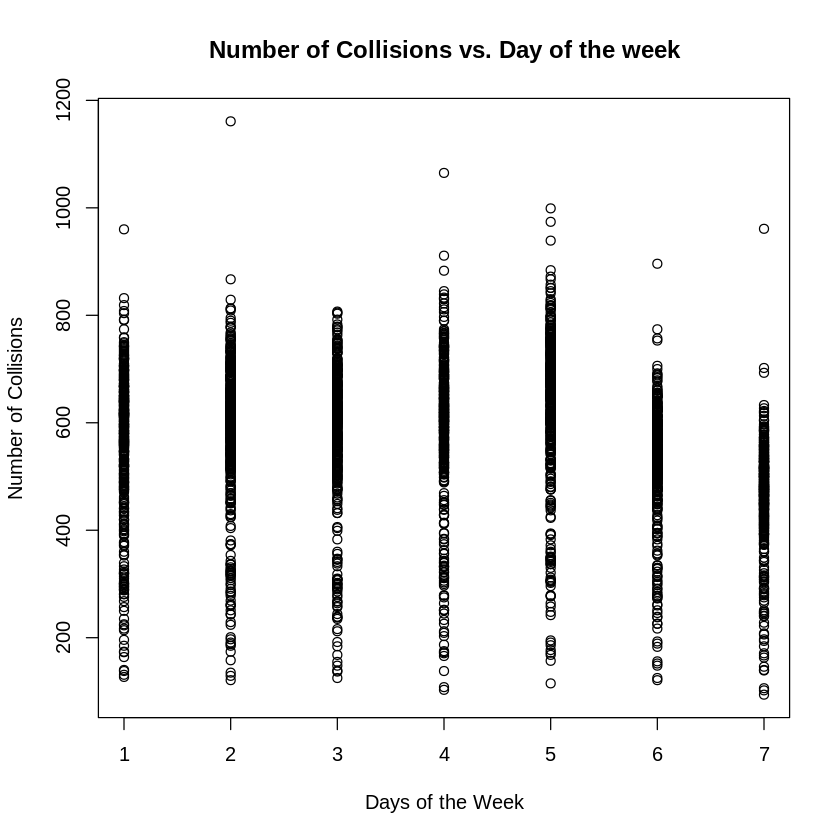

In [184]:
 plot(totalcolscollated$day, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week", xlab="Days of the Week", ylab="Number of Collisions")

For symmeterical suppose, we will move days 6 and 7 forward to 2 and 1 respectively.

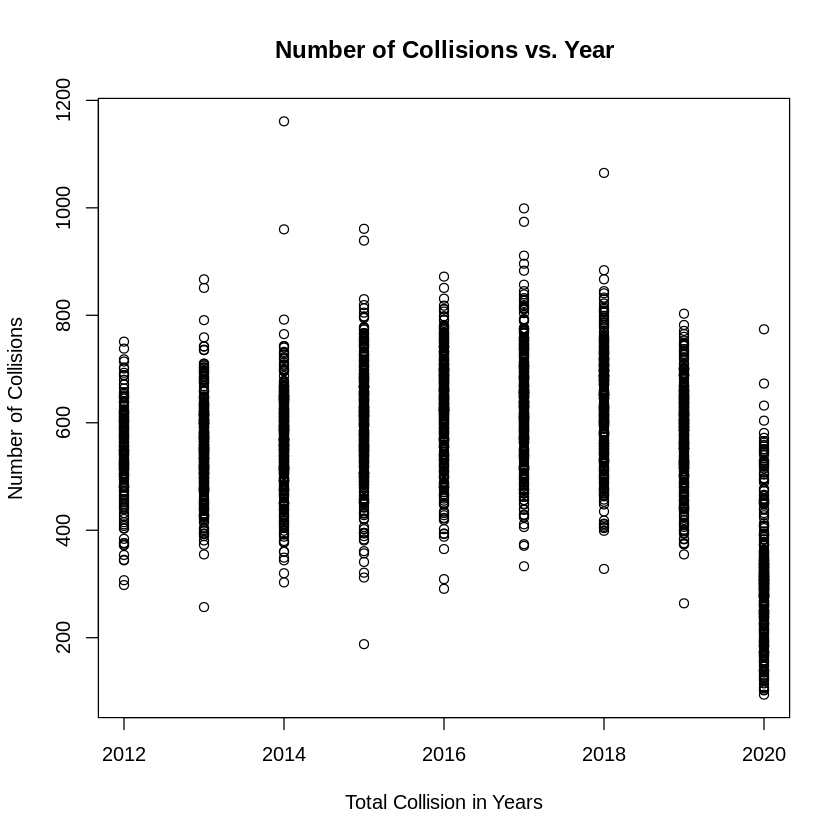

In [185]:
plot(totalcolscollated$year, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Year", xlab="Total Collision in Years", ylab="Number of Collisions")

We will make some changes here before we continue our investigation and analysis.

1. We will move Sunday(7) and Saturday(6) to (1) and (2) respectively for symetrical analysis.

2. We will take out the year 2020 in order to work with a pattern of data since 2020 had COVID-19, therefore, 2020 data will not be much reliable because of the lockdown.

In [186]:
# Add 1 to all values, this shifts all days forward
totalcolscollated$day <- totalcolscollated$day+2
totalcolscollated$day[totalcolscollated$day == 8] <- 2
totalcolscollated$day[totalcolscollated$day == 9] <- 1

In [187]:
library(dplyr)
# Remove the year 2020
totalcolscollated <- totalcolscollated %>%
  filter(year != 2020)

In [188]:
head(totalcolscollated)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


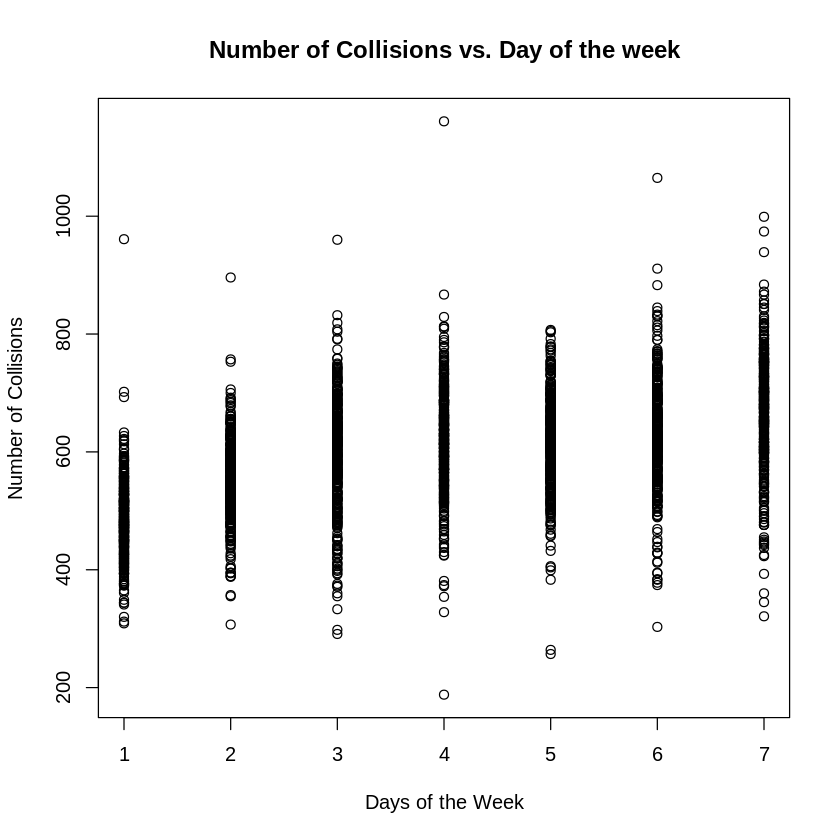

In [189]:
 plot(totalcolscollated$day, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week", xlab="Days of the Week", ylab="Number of Collisions")

In the plot, Sunday is now 1.
We see an upward trend in the pattern.

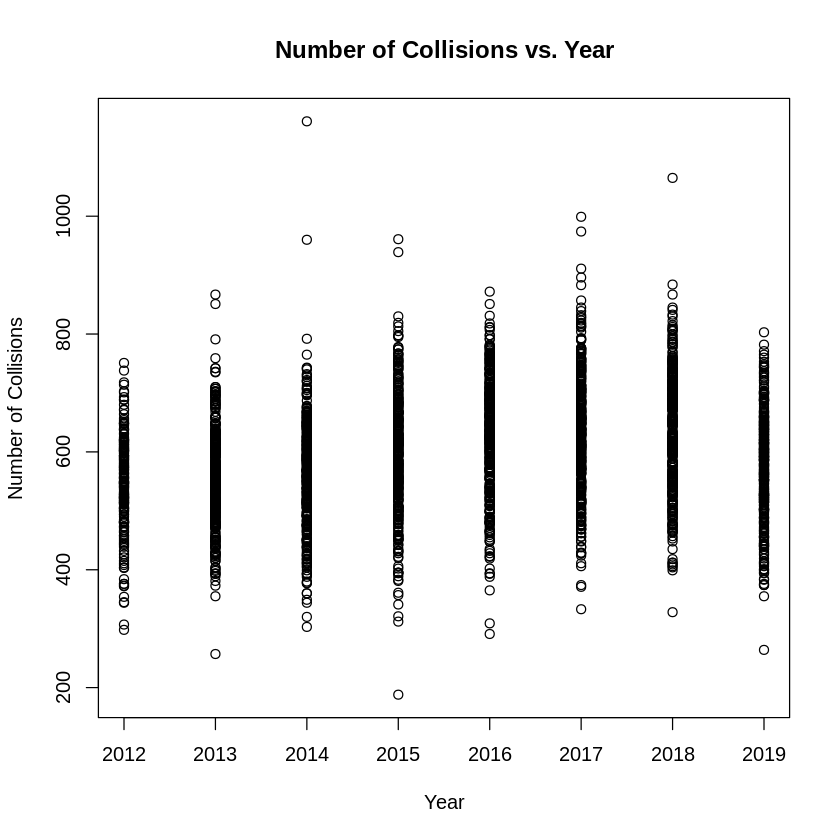

In [190]:
plot(totalcolscollated$year, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Year", xlab="Year", ylab="Number of Collisions")

The year 2020 has been taken away from the dataset so we can have smooth pattern in the analysis.

In [191]:
cor(totalcolscollated$day, totalcolscollated$NUM_COLLISIONS)

[1] 0.497619

A correlation of 0.498 indicates a moderate, positive linear relationship. This suggests that, as the day variable increases, the NUM_COLLISIONS tends to increase as well.
Certain days of the week see a higher incidence of collisions.
Increased traffic volume or different travel behaviors on these days might contribute to more collisions.
There may be underlying factors, such as weather conditions, traffic patterns, social behavior or seasonal trends, influencing both the day and the number of collisions.

The correlation result of 0.498 suggests that day of the week has a moderate influence on the number of collisions, with a potential tendency for certain days to experience higher collision rates. Further analysis could help clarify specific day-based patterns and the role of other influencing factors.

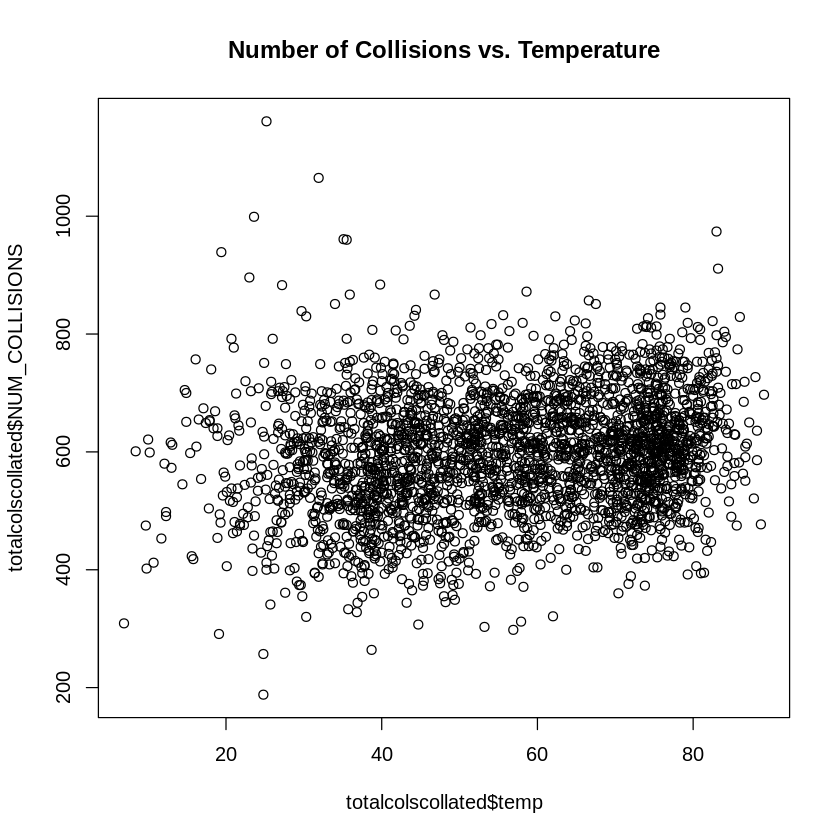

In [192]:
plot(totalcolscollated$temp, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Temperature")

The scatter plot above shows a broad distribution of points, there doesn’t appear to be a strong pattern or consistent trend between temperature and collisions. The points are scattered without a clear upward or downward trend, indicating that temperature alone may not strongly influence the number of collisions.

There might be a slight upward spread, suggesting that as temperature increases, there could be a small increase in collisions. However, the spread is minimal, and the points remain largely dispersed, not forming any concentrated pattern.

The scatter plot shows that while temperature might have some influence on collision rates, there is no obvious linear or monotonic relationship in this dataset. Temperature likely interacts with other weather-related or external factors to influence collision occurrences.



In [193]:
cor(totalcolscollated$temp, totalcolscollated$NUM_COLLISIONS)

[1] 0.1949215

CORRELATION BETWEEN THE NUMBER OF COLLISIONS AND THE TEMPERATURE:
The value is 0.195.
This value means that there is a slight tendency for higher temperatures to be associated with an increase in the number of collisions, but the relationship is weak and likely not statistically significant.
A correlation of 0.195 suggests that temperature explains only a small portion of the variation in collision frequency. Other factors, such as day of the week, traffic volume or specific weather events like rain, fog, etc, might play a substantial role in affecting the number of collisions.

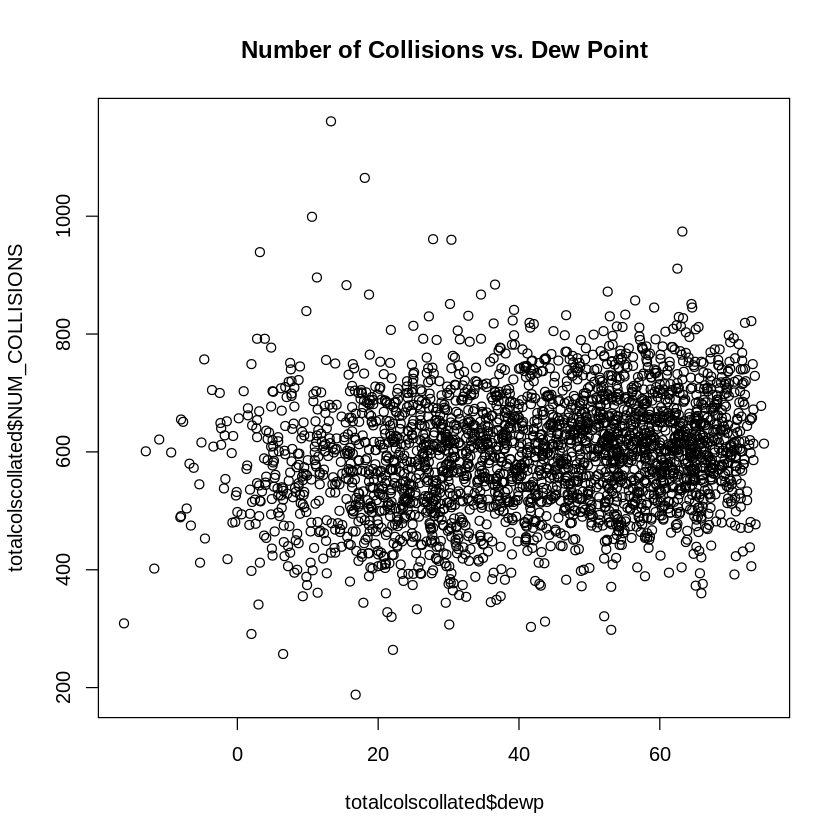

In [194]:
plot(totalcolscollated$dewp, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Dew Point")

In [195]:
cor(totalcolscollated$dewp, totalcolscollated$NUM_COLLISIONS)

[1] 0.1824911

From the plot, the points appear widely dispersed, indicating that there is not a strong or clear trend connecting higher dew points with a higher or lower number of collisions. This scattered arrangement suggests that dew point has limited impact on the number of collisions, or at least not in a straightforward linear manner.

There might be a slight upward spread in some parts, indicating that in specific ranges of dew point values, there could be a mild increase in collisions, but this trend is weak and not consistent across the full range.

A correlation of 0.182 suggests that there is only a slight tendency for higher dew points to be associated with a small increase in collisions, but this relationship is weak and may not be statistically significant.

The low correlation implies that changes in dew point explain very little of the variation in collision frequency, indicating that dew point alone does not substantially influence the number of collisions.

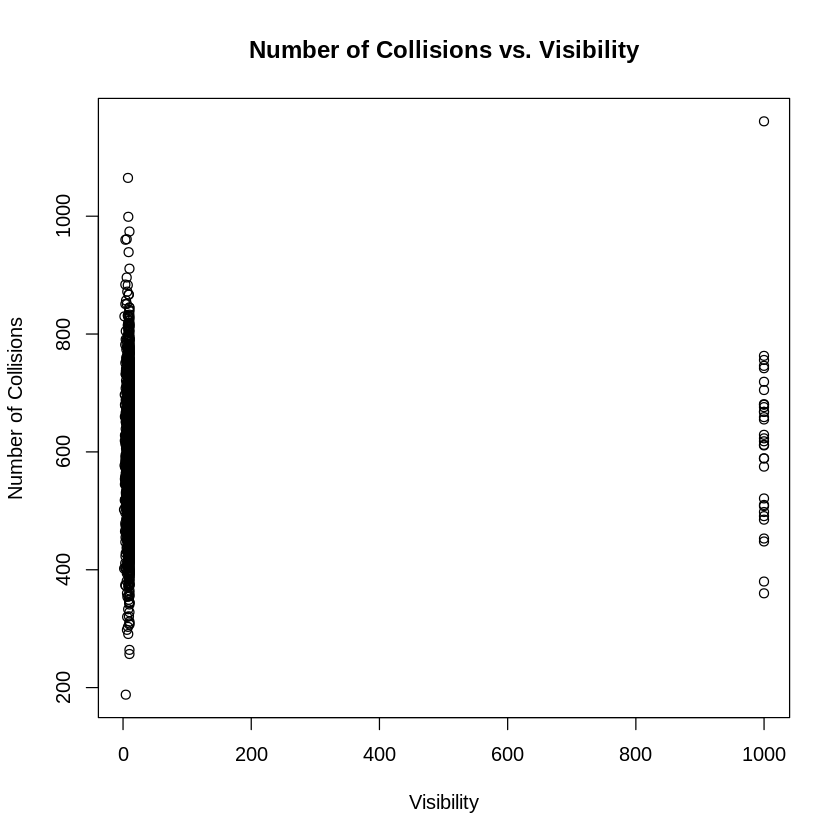

In [196]:
plot(totalcolscollated$visib, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Visibility", xlab="Visibility", ylab="Number of Collisions")

Observing the plot, the data points appear to be widely spread with no discernible pattern or trend linking visibility to the number of collisions. The lack of clustering or a clear line of best fit suggests there is no strong linear relationship between these two variables.
This scattered distribution supports the idea that visibility, as measured in this dataset, does not have a noticeable or consistent effect on the frequency of collisions.

In [197]:
cor(totalcolscollated$visib, totalcolscollated$NUM_COLLISIONS)

[1] 0.02357976

The value is 0.024.
A correlation this close to zero suggests almost no linear relationship between visibility and collision count. It implies that changes in visibility do not significantly influence the number of collisions, or at least not in a straightforward way.
In practice, this means that visibility has little to no influence on the number of collisions in this dataset.

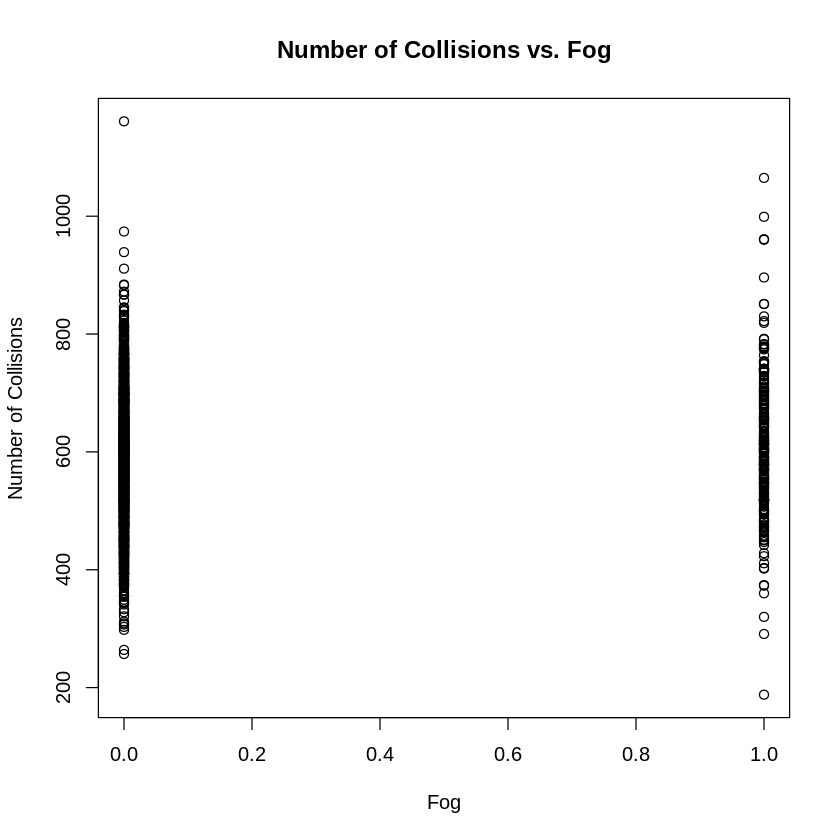

In [198]:
plot(totalcolscollated$fog, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Fog", xlab="Fog", ylab="Number of Collisions")

In [199]:
cor(totalcolscollated$fog, totalcolscollated$NUM_COLLISIONS)

[1] 0.04299589

 A large majority of the data points are clustered around fog being absent (0). The number of collisions under this condition shows a wide range, suggesting that a majority of collisions occur when there is no fog.
 There are fewer data points when fog is present (1), but the range of collisions in foggy conditions is still quite wide, indicating that collisions can also occur during fog.

 It is apparent that the number of collisions is generally higher when there is no fog. The presence of fog does not result in a dramatic increase in the number of collisions, though there are some collisions observed in foggy conditions.


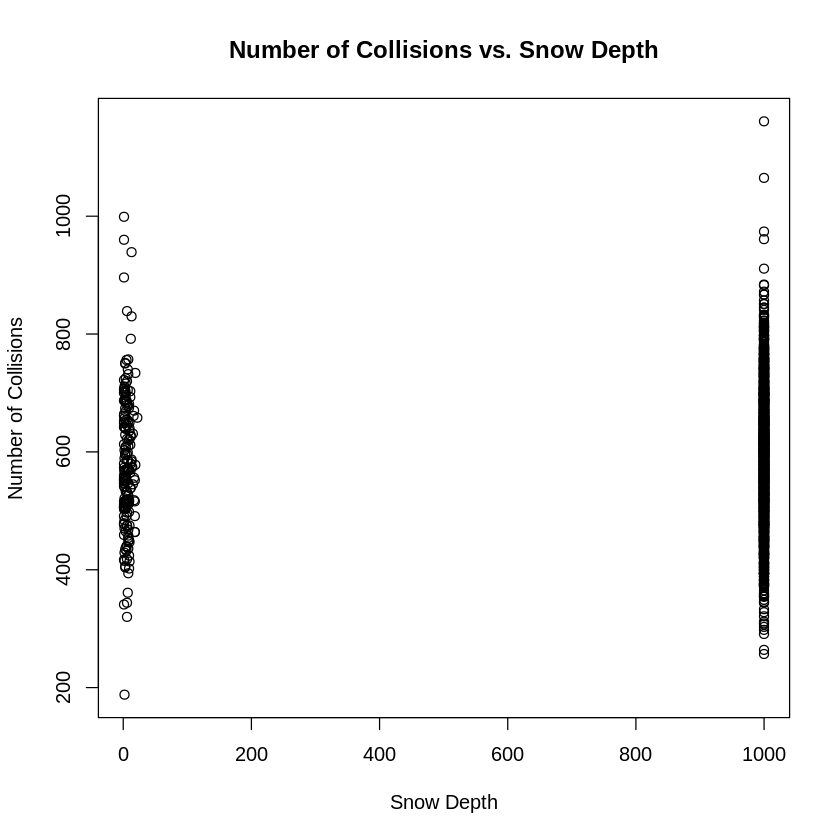

In [200]:
plot(totalcolscollated$sndp, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Snow Depth", xlab="Snow Depth", ylab="Number of Collisions")

In [201]:
cor(totalcolscollated$sndp, totalcolscollated$NUM_COLLISIONS)

[1] 0.04735677

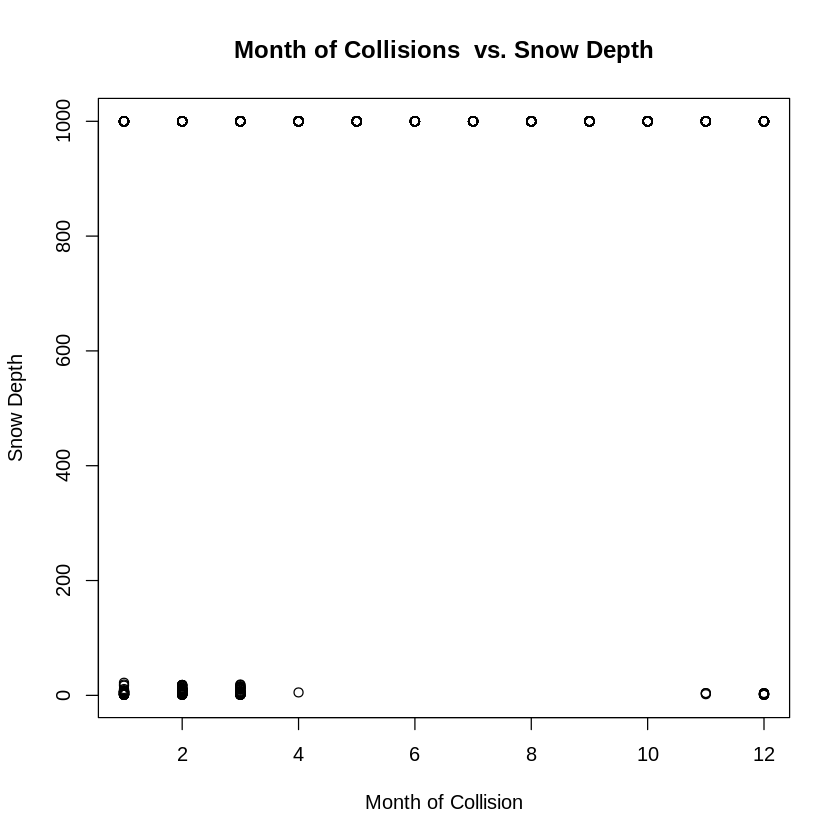

In [202]:
plot(totalcolscollated$mo, totalcolscollated$sndp, main="Month of Collisions  vs. Snow Depth", xlab="Month of Collision", ylab="Snow Depth")

In [203]:
cor(totalcolscollated$mo, totalcolscollated$sndp)

[1] 0.2887777

The relatively low correlation (less than 0.3) indicates that while there is some seasonal pattern, it’s not a strong or perfectly linear relationship. This likely reflects the fact that snow depth can vary widely due to other factors like specific weather events.

The weak correlation suggests that while snow depth does align with colder months, it is not the only factor influencing collision risks by season. Other factors, like temperature fluctuations, precipitation or day length, may also play significant roles in affecting road safety across different months.

In [204]:
library(lattice)

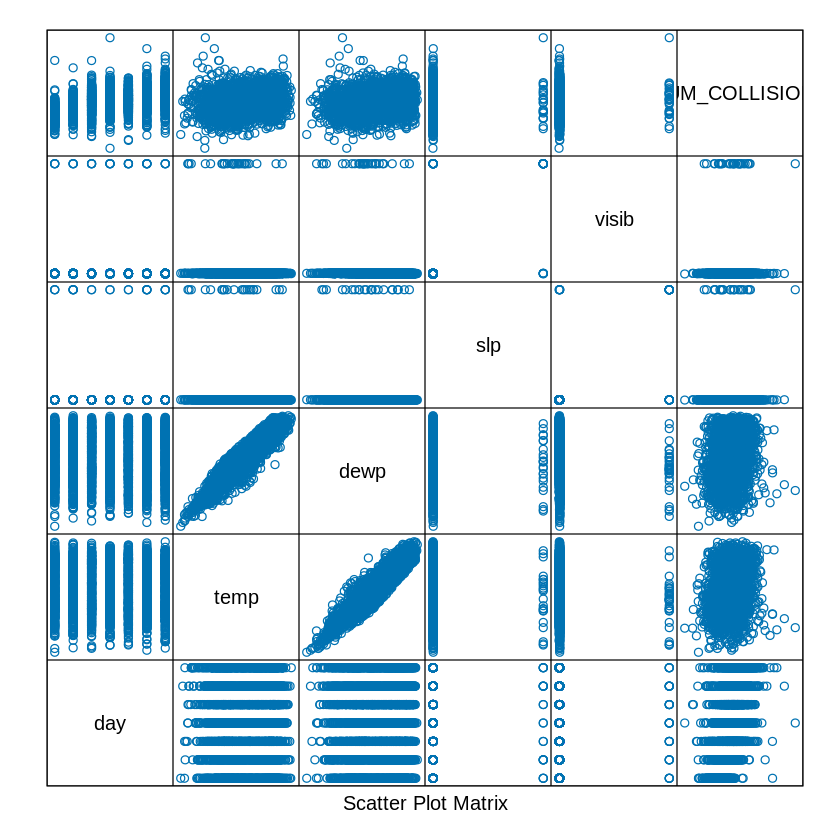

In [205]:
splom(~ totalcolscollated[,c(1,6,7, 8,9,18)], groups=NULL, data=totalcolscollated,
axis.line.tck=0, axis.text.alpha=0)

The scatterplot matrix is a grid of scatter plots displaying the pairwise relationships between selected variables in the dataset totalcolscollated. Here is an analysis of the matrix based on the visible plots:

1. NUM_COLLISION and Visibility (visib):
The scatter plot between NUM_COLLISION and visib shows a relatively dispersed pattern.
The relationship between visibility and the number of collisions appears weak or non-linear, suggesting that visibility alone does not strongly influence collision frequency. This aligns with the low correlation (near zero) found between visibility and collision numbers in earlier analyses.
2. NUM_COLLISION and Sea-Level Pressure (slp):
There is no distinct trend visible between NUM_COLLISION and slp.
Similar to visibility, the lack of a clear pattern here suggests that sea-level pressure is not a primary factor affecting the number of collisions.
3. NUM_COLLISION and Dew Point (dewp):
There is a broad, somewhat dispersed distribution between M_COLLISIO and dewp, with no strong linear or nonlinear trend.
This indicates that dew point temperature does not have a direct or strong impact on collision counts, possibly reflecting that it is less relevant to collision likelihood compared to other weather factors.
4. NUM_COLLISION and Temperature (temp):
The scatter plot for NUM_COLLISION and temp shows a similarly weak pattern.
As analysed previously, the correlation between temperature and collisions is low, indicating that temperature does not strongly predict collision frequency. However, some slight seasonality might still be present, as temperature indirectly relates to winter driving conditions.
5. Dew Point (dewp) and Temperature (temp):
The relationship between dewp and temp shows a clear positive linear trend.
Dew point temperature and air temperature are often correlated because both are influenced by atmospheric moisture. This strong positive correlation indicates that as the temperature increases, the dew point also tends to increase, which is typical in humid conditions.
6. Day and Collision Frequency:
Plots involving the variable day show that collision counts vary across different days but without a clear pattern.
This likely means that day-to-day variation does not consistently correlate with collision frequency, possibly indicating that specific days are not as predictive for collisions in this dataset.

The scatterplot matrix reveals that most environmental and temporal variables (visibility, sea-level pressure, dew point, and temperature) do not have strong relationships with collision frequency. However, the matrix does reveal one strong correlation between temp and dewp, which is a predictable relationship in meteorology, as both increase with humidity and warmer conditions.

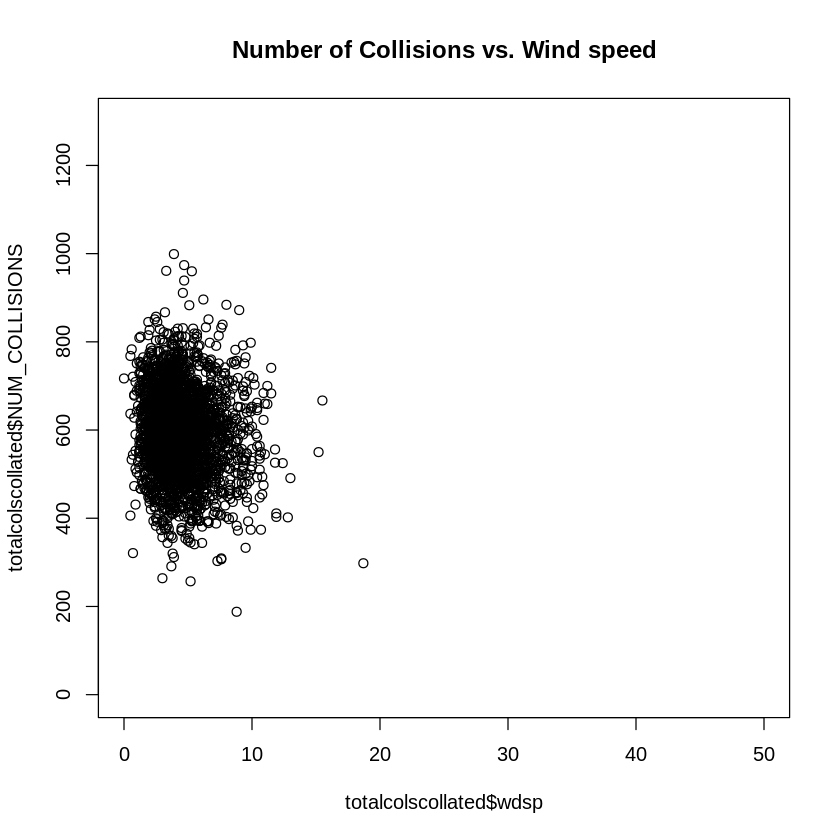

In [206]:
plot(totalcolscollated$wdsp, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Wind speed", xlim=c(0,50), ylim=c(0,1300))

The points in the plot appear widely scattered with no clear upward or downward trend, indicating a lack of strong relationship between wind speed and the number of collisions.


In [207]:
cor(totalcolscollated$wdsp, totalcolscollated$NUM_COLLISIONS)

[1] 0.03506239

This value indicates an extremely weak positive correlation between wind speed and the number of collisions.
Given this near-zero correlation, wind speed has little to no predictive value for the number of collisions. In other words, wind speed changes are not significantly associated with variations in collision frequency in this dataset.

We will check data trends and insights year-by-year to verify collisions due to weather conditions across the years.

In [208]:
totalcolscollated$collision_date[0:184]

[1] 2012-07-01 2012-07-02 2012-07-03 2012-07-04 2012-07-05 2012-07-06
  [7] 2012-07-07 2012-07-08 2012-07-09 2012-07-10 2012-07-11 2012-07-12
 [13] 2012-07-13 2012-07-14 2012-07-15 2012-07-16 2012-07-17 2012-07-18
 [19] 2012-07-19 2012-07-20 2012-07-21 2012-07-22 2012-07-23 2012-07-24
 [25] 2012-07-25 2012-07-26 2012-07-27 2012-07-28 2012-07-29 2012-07-30
 [31] 2012-07-31 2012-08-01 2012-08-02 2012-08-03 2012-08-04 2012-08-05
 [37] 2012-08-06 2012-08-07 2012-08-08 2012-08-09 2012-08-10 2012-08-11
 [43] 2012-08-12 2012-08-13 2012-08-14 2012-08-15 2012-08-16 2012-08-17
 [49] 2012-08-18 2012-08-19 2012-08-20 2012-08-21 2012-08-22 2012-08-23
 [55] 2012-08-24 2012-08-25 2012-08-26 2012-08-27 2012-08-28 2012-08-29
 [61] 2012-08-30 2012-08-31 2012-09-01 2012-09-02 2012-09-03 2012-09-04
 [67] 2012-09-05 2012-09-06 2012-09-07 2012-09-08 2012-09-09 2012-09-10
 [73] 2012-09-11 2012-09-12 2012-09-13 2012-09-14 2012-09-15 2012-09-16
 [79] 2012-09-17 2012-09-18 2012-09-19 2012-09-20 2012-09-21 2012-09-22
 [85] 2012-09-23 2012-09-24 2012-09-25 2012-09-26 2012-09-27 2012-09-28
 [91] 2012-09-29 2012-09-30 2012-10-01 2012-10-02 2012-10-03 2012-10-04
 [97] 2012-10-05 2012-10-06 2012-10-07 2012-10-08 2012-10-09 2012-10-10
[103] 2012-10-11 2012-10-12 2012-10-13 2012-10-14 2012-10-15 2012-10-16
[109] 2012-10-17 2012-10-18 2012-10-19 2012-10-20 2012-10-21 2012-10-22
[115] 2012-10-23 2012-10-24 2012-10-25 2012-10-26 2012-10-27 2012-10-28
[121] 2012-10-29 2012-10-30 2012-10-31 2012-11-01 2012-11-02 2012-11-03
[127] 2012-11-04 2012-11-05 2012-11-06 2012-11-07 2012-11-08 2012-11-09
[133] 2012-11-10 2012-11-11 2012-11-12 2012-11-13 2012-11-14 2012-11-15
[139] 2012-11-16 2012-11-17 2012-11-18 2012-11-19 2012-11-20 2012-11-21
[145] 2012-11-22 2012-11-23 2012-11-24 2012-11-25 2012-11-26 2012-11-27
[151] 2012-11-28 2012-11-29 2012-11-30 2012-12-01 2012-12-02 2012-12-03
[157] 2012-12-04 2012-12-05 2012-12-06 2012-12-07 2012-12-08 2012-12-09
[163] 2012-12-10 2012-12-11 2012-12-12 2012-12-13 2012-12-14 2012-12-15
[169] 2012-12-16 2012-12-17 2012-12-18 2012-12-19 2012-12-20 2012-12-21
[175] 2012-12-22 2012-12-23 2012-12-24 2012-12-25 2012-12-26 2012-12-27
[181] 2012-12-28 2012-12-29 2012-12-30 2012-12-31
3106 Levels: 2012-07-01 2012-07-02 2012-07-03 2012-07-04 ... 2020-12-31

In [209]:
totalcolscollated$collision_date[185:549]

[1] 2013-01-01 2013-01-02 2013-01-03 2013-01-04 2013-01-05 2013-01-06
  [7] 2013-01-07 2013-01-08 2013-01-09 2013-01-10 2013-01-11 2013-01-12
 [13] 2013-01-13 2013-01-14 2013-01-15 2013-01-16 2013-01-17 2013-01-18
 [19] 2013-01-19 2013-01-20 2013-01-21 2013-01-22 2013-01-23 2013-01-24
 [25] 2013-01-25 2013-01-26 2013-01-27 2013-01-28 2013-01-29 2013-01-30
 [31] 2013-01-31 2013-02-01 2013-02-02 2013-02-03 2013-02-04 2013-02-05
 [37] 2013-02-06 2013-02-07 2013-02-08 2013-02-09 2013-02-10 2013-02-11
 [43] 2013-02-12 2013-02-13 2013-02-14 2013-02-15 2013-02-16 2013-02-17
 [49] 2013-02-18 2013-02-19 2013-02-20 2013-02-21 2013-02-22 2013-02-23
 [55] 2013-02-24 2013-02-25 2013-02-26 2013-02-27 2013-02-28 2013-03-01
 [61] 2013-03-02 2013-03-03 2013-03-04 2013-03-05 2013-03-06 2013-03-07
 [67] 2013-03-08 2013-03-09 2013-03-10 2013-03-11 2013-03-12 2013-03-13
 [73] 2013-03-14 2013-03-15 2013-03-16 2013-03-17 2013-03-18 2013-03-19
 [79] 2013-03-20 2013-03-21 2013-03-22 2013-03-23 2013-03-24 2013-03-25
 [85] 2013-03-26 2013-03-27 2013-03-28 2013-03-29 2013-03-30 2013-03-31
 [91] 2013-04-01 2013-04-02 2013-04-03 2013-04-04 2013-04-05 2013-04-06
 [97] 2013-04-07 2013-04-08 2013-04-09 2013-04-10 2013-04-11 2013-04-12
[103] 2013-04-13 2013-04-14 2013-04-15 2013-04-16 2013-04-17 2013-04-18
[109] 2013-04-19 2013-04-20 2013-04-21 2013-04-22 2013-04-23 2013-04-24
[115] 2013-04-25 2013-04-26 2013-04-27 2013-04-28 2013-04-29 2013-04-30
[121] 2013-05-01 2013-05-02 2013-05-03 2013-05-04 2013-05-05 2013-05-06
[127] 2013-05-07 2013-05-08 2013-05-09 2013-05-10 2013-05-11 2013-05-12
[133] 2013-05-13 2013-05-14 2013-05-15 2013-05-16 2013-05-17 2013-05-18
[139] 2013-05-19 2013-05-20 2013-05-21 2013-05-22 2013-05-23 2013-05-24
[145] 2013-05-25 2013-05-26 2013-05-27 2013-05-28 2013-05-29 2013-05-30
[151] 2013-05-31 2013-06-01 2013-06-02 2013-06-03 2013-06-04 2013-06-05
[157] 2013-06-06 2013-06-07 2013-06-08 2013-06-09 2013-06-10 2013-06-11
[163] 2013-06-12 2013-06-13 2013-06-14 2013-06-15 2013-06-16 2013-06-17
[169] 2013-06-18 2013-06-19 2013-06-20 2013-06-21 2013-06-22 2013-06-23
[175] 2013-06-24 2013-06-25 2013-06-26 2013-06-27 2013-06-28 2013-06-29
[181] 2013-06-30 2013-07-01 2013-07-02 2013-07-03 2013-07-04 2013-07-05
[187] 2013-07-06 2013-07-07 2013-07-08 2013-07-09 2013-07-10 2013-07-11
[193] 2013-07-12 2013-07-13 2013-07-14 2013-07-15 2013-07-16 2013-07-17
[199] 2013-07-18 2013-07-19 2013-07-20 2013-07-21 2013-07-22 2013-07-23
[205] 2013-07-24 2013-07-25 2013-07-26 2013-07-27 2013-07-28 2013-07-29
[211] 2013-07-30 2013-07-31 2013-08-01 2013-08-02 2013-08-03 2013-08-04
[217] 2013-08-05 2013-08-06 2013-08-07 2013-08-08 2013-08-09 2013-08-10
[223] 2013-08-11 2013-08-12 2013-08-13 2013-08-14 2013-08-15 2013-08-16
[229] 2013-08-17 2013-08-18 2013-08-19 2013-08-20 2013-08-21 2013-08-22
[235] 2013-08-23 2013-08-24 2013-08-25 2013-08-26 2013-08-27 2013-08-28
[241] 2013-08-29 2013-08-30 2013-08-31 2013-09-01 2013-09-02 2013-09-03
[247] 2013-09-04 2013-09-05 2013-09-06 2013-09-07 2013-09-08 2013-09-09
[253] 2013-09-10 2013-09-11 2013-09-12 2013-09-13 2013-09-14 2013-09-15
[259] 2013-09-16 2013-09-17 2013-09-18 2013-09-19 2013-09-20 2013-09-21
[265] 2013-09-22 2013-09-23 2013-09-24 2013-09-25 2013-09-26 2013-09-27
[271] 2013-09-28 2013-09-29 2013-09-30 2013-10-01 2013-10-02 2013-10-03
[277] 2013-10-04 2013-10-05 2013-10-06 2013-10-07 2013-10-08 2013-10-09
[283] 2013-10-10 2013-10-11 2013-10-12 2013-10-13 2013-10-14 2013-10-15
[289] 2013-10-16 2013-10-17 2013-10-18 2013-10-19 2013-10-20 2013-10-21
[295] 2013-10-22 2013-10-23 2013-10-24 2013-10-25 2013-10-26 2013-10-27
[301] 2013-10-28 2013-10-29 2013-10-30 2013-10-31 2013-11-01 2013-11-02
[307] 2013-11-03 2013-11-04 2013-11-05 2013-11-06 2013-11-07 2013-11-08
[313] 2013-11-09 2013-11-10 2013-11-11 2013-11-12 2013-11-13 2013-11-14
[319] 2013-11-15 2013-11-16 2013-11-17 2013-11-18 2013-11-19 2013-11-20
[325] 2013-11-21 2013-11-22 2013-11-23 2013-11-24 2013-11-25 2013-11-26
[331] 2013-11-27 2013-11-28 2013-11-29 201

In [210]:
totalcolscollated$collision_date[550:914]

[1] 2014-01-01 2014-01-02 2014-01-03 2014-01-04 2014-01-05 2014-01-06
  [7] 2014-01-07 2014-01-08 2014-01-09 2014-01-10 2014-01-11 2014-01-12
 [13] 2014-01-13 2014-01-14 2014-01-15 2014-01-16 2014-01-17 2014-01-18
 [19] 2014-01-19 2014-01-20 2014-01-21 2014-01-22 2014-01-23 2014-01-24
 [25] 2014-01-25 2014-01-26 2014-01-27 2014-01-28 2014-01-29 2014-01-30
 [31] 2014-01-31 2014-02-01 2014-02-02 2014-02-03 2014-02-04 2014-02-05
 [37] 2014-02-06 2014-02-07 2014-02-08 2014-02-09 2014-02-10 2014-02-11
 [43] 2014-02-12 2014-02-13 2014-02-14 2014-02-15 2014-02-16 2014-02-17
 [49] 2014-02-18 2014-02-19 2014-02-20 2014-02-21 2014-02-22 2014-02-23
 [55] 2014-02-24 2014-02-25 2014-02-26 2014-02-27 2014-02-28 2014-03-01
 [61] 2014-03-02 2014-03-03 2014-03-04 2014-03-05 2014-03-06 2014-03-07
 [67] 2014-03-08 2014-03-09 2014-03-10 2014-03-11 2014-03-12 2014-03-13
 [73] 2014-03-14 2014-03-15 2014-03-16 2014-03-17 2014-03-18 2014-03-19
 [79] 2014-03-20 2014-03-21 2014-03-22 2014-03-23 2014-03-24 2014-03-25
 [85] 2014-03-26 2014-03-27 2014-03-28 2014-03-29 2014-03-30 2014-03-31
 [91] 2014-04-01 2014-04-02 2014-04-03 2014-04-04 2014-04-05 2014-04-06
 [97] 2014-04-07 2014-04-08 2014-04-09 2014-04-10 2014-04-11 2014-04-12
[103] 2014-04-13 2014-04-14 2014-04-15 2014-04-16 2014-04-17 2014-04-18
[109] 2014-04-19 2014-04-20 2014-04-21 2014-04-22 2014-04-23 2014-04-24
[115] 2014-04-25 2014-04-26 2014-04-27 2014-04-28 2014-04-29 2014-04-30
[121] 2014-05-01 2014-05-02 2014-05-03 2014-05-04 2014-05-05 2014-05-06
[127] 2014-05-07 2014-05-08 2014-05-09 2014-05-10 2014-05-11 2014-05-12
[133] 2014-05-13 2014-05-14 2014-05-15 2014-05-16 2014-05-17 2014-05-18
[139] 2014-05-19 2014-05-20 2014-05-21 2014-05-22 2014-05-23 2014-05-24
[145] 2014-05-25 2014-05-26 2014-05-27 2014-05-28 2014-05-29 2014-05-30
[151] 2014-05-31 2014-06-01 2014-06-02 2014-06-03 2014-06-04 2014-06-05
[157] 2014-06-06 2014-06-07 2014-06-08 2014-06-09 2014-06-10 2014-06-11
[163] 2014-06-12 2014-06-13 2014-06-14 2014-06-15 2014-06-16 2014-06-17
[169] 2014-06-18 2014-06-19 2014-06-20 2014-06-21 2014-06-22 2014-06-23
[175] 2014-06-24 2014-06-25 2014-06-26 2014-06-27 2014-06-28 2014-06-29
[181] 2014-06-30 2014-07-01 2014-07-02 2014-07-03 2014-07-04 2014-07-05
[187] 2014-07-06 2014-07-07 2014-07-08 2014-07-09 2014-07-10 2014-07-11
[193] 2014-07-12 2014-07-13 2014-07-14 2014-07-15 2014-07-16 2014-07-17
[199] 2014-07-18 2014-07-19 2014-07-20 2014-07-21 2014-07-22 2014-07-23
[205] 2014-07-24 2014-07-25 2014-07-26 2014-07-27 2014-07-28 2014-07-29
[211] 2014-07-30 2014-07-31 2014-08-01 2014-08-02 2014-08-03 2014-08-04
[217] 2014-08-05 2014-08-06 2014-08-07 2014-08-08 2014-08-09 2014-08-10
[223] 2014-08-11 2014-08-12 2014-08-13 2014-08-14 2014-08-15 2014-08-16
[229] 2014-08-17 2014-08-18 2014-08-19 2014-08-20 2014-08-21 2014-08-22
[235] 2014-08-23 2014-08-24 2014-08-25 2014-08-26 2014-08-27 2014-08-28
[241] 2014-08-29 2014-08-30 2014-08-31 2014-09-01 2014-09-02 2014-09-03
[247] 2014-09-04 2014-09-05 2014-09-06 2014-09-07 2014-09-08 2014-09-09
[253] 2014-09-10 2014-09-11 2014-09-12 2014-09-13 2014-09-14 2014-09-15
[259] 2014-09-16 2014-09-17 2014-09-18 2014-09-19 2014-09-20 2014-09-21
[265] 2014-09-22 2014-09-23 2014-09-24 2014-09-25 2014-09-26 2014-09-27
[271] 2014-09-28 2014-09-29 2014-09-30 2014-10-01 2014-10-02 2014-10-03
[277] 2014-10-04 2014-10-05 2014-10-06 2014-10-07 2014-10-08 2014-10-09
[283] 2014-10-10 2014-10-11 2014-10-12 2014-10-13 2014-10-14 2014-10-15
[289] 2014-10-16 2014-10-17 2014-10-18 2014-10-19 2014-10-20 2014-10-21
[295] 2014-10-22 2014-10-23 2014-10-24 2014-10-25 2014-10-26 2014-10-27
[301] 2014-10-28 2014-10-29 2014-10-30 2014-10-31 2014-11-01 2014-11-02
[307] 2014-11-03 2014-11-04 2014-11-05 2014-11-06 2014-11-07 2014-11-08
[313] 2014-11-09 2014-11-10 2014-11-11 2014-11-12 2014-11-13 2014-11-14
[319] 2014-11-15 2014-11-16 2014-11-17 2014-11-18 2014-11-19 2014-11-20
[325] 2014-11-21 2014-11-22 2014-11-23 2014-11-24 2014-11-25 2014-11-26
[331] 2014-11-27 2014-11-28 2014-11-29 201

In [211]:
totalcolscollated$collision_date[915:1279]

[1] 2015-01-01 2015-01-02 2015-01-03 2015-01-04 2015-01-05 2015-01-06
  [7] 2015-01-07 2015-01-08 2015-01-09 2015-01-10 2015-01-11 2015-01-12
 [13] 2015-01-13 2015-01-14 2015-01-15 2015-01-16 2015-01-17 2015-01-18
 [19] 2015-01-19 2015-01-20 2015-01-21 2015-01-22 2015-01-23 2015-01-24
 [25] 2015-01-25 2015-01-26 2015-01-27 2015-01-28 2015-01-29 2015-01-30
 [31] 2015-01-31 2015-02-01 2015-02-02 2015-02-03 2015-02-04 2015-02-05
 [37] 2015-02-06 2015-02-07 2015-02-08 2015-02-09 2015-02-10 2015-02-11
 [43] 2015-02-12 2015-02-13 2015-02-14 2015-02-15 2015-02-16 2015-02-17
 [49] 2015-02-18 2015-02-19 2015-02-20 2015-02-21 2015-02-22 2015-02-23
 [55] 2015-02-24 2015-02-25 2015-02-26 2015-02-27 2015-02-28 2015-03-01
 [61] 2015-03-02 2015-03-03 2015-03-04 2015-03-05 2015-03-06 2015-03-07
 [67] 2015-03-08 2015-03-09 2015-03-10 2015-03-11 2015-03-12 2015-03-13
 [73] 2015-03-14 2015-03-15 2015-03-16 2015-03-17 2015-03-18 2015-03-19
 [79] 2015-03-20 2015-03-21 2015-03-22 2015-03-23 2015-03-24 2015-03-25
 [85] 2015-03-26 2015-03-27 2015-03-28 2015-03-29 2015-03-30 2015-03-31
 [91] 2015-04-01 2015-04-02 2015-04-03 2015-04-04 2015-04-05 2015-04-06
 [97] 2015-04-07 2015-04-08 2015-04-09 2015-04-10 2015-04-11 2015-04-12
[103] 2015-04-13 2015-04-14 2015-04-15 2015-04-16 2015-04-17 2015-04-18
[109] 2015-04-19 2015-04-20 2015-04-21 2015-04-22 2015-04-23 2015-04-24
[115] 2015-04-25 2015-04-26 2015-04-27 2015-04-28 2015-04-29 2015-04-30
[121] 2015-05-01 2015-05-02 2015-05-03 2015-05-04 2015-05-05 2015-05-06
[127] 2015-05-07 2015-05-08 2015-05-09 2015-05-10 2015-05-11 2015-05-12
[133] 2015-05-13 2015-05-14 2015-05-15 2015-05-16 2015-05-17 2015-05-18
[139] 2015-05-19 2015-05-20 2015-05-21 2015-05-22 2015-05-23 2015-05-24
[145] 2015-05-25 2015-05-26 2015-05-27 2015-05-28 2015-05-29 2015-05-30
[151] 2015-05-31 2015-06-01 2015-06-02 2015-06-03 2015-06-04 2015-06-05
[157] 2015-06-06 2015-06-07 2015-06-08 2015-06-09 2015-06-10 2015-06-11
[163] 2015-06-12 2015-06-13 2015-06-14 2015-06-15 2015-06-16 2015-06-17
[169] 2015-06-18 2015-06-19 2015-06-20 2015-06-21 2015-06-22 2015-06-23
[175] 2015-06-24 2015-06-25 2015-06-26 2015-06-27 2015-06-28 2015-06-29
[181] 2015-06-30 2015-07-01 2015-07-02 2015-07-03 2015-07-04 2015-07-05
[187] 2015-07-06 2015-07-07 2015-07-08 2015-07-09 2015-07-10 2015-07-11
[193] 2015-07-12 2015-07-13 2015-07-14 2015-07-15 2015-07-16 2015-07-17
[199] 2015-07-18 2015-07-19 2015-07-20 2015-07-21 2015-07-22 2015-07-23
[205] 2015-07-24 2015-07-25 2015-07-26 2015-07-27 2015-07-28 2015-07-29
[211] 2015-07-30 2015-07-31 2015-08-01 2015-08-02 2015-08-03 2015-08-04
[217] 2015-08-05 2015-08-06 2015-08-07 2015-08-08 2015-08-09 2015-08-10
[223] 2015-08-11 2015-08-12 2015-08-13 2015-08-14 2015-08-15 2015-08-16
[229] 2015-08-17 2015-08-18 2015-08-19 2015-08-20 2015-08-21 2015-08-22
[235] 2015-08-23 2015-08-24 2015-08-25 2015-08-26 2015-08-27 2015-08-28
[241] 2015-08-29 2015-08-30 2015-08-31 2015-09-01 2015-09-02 2015-09-03
[247] 2015-09-04 2015-09-05 2015-09-06 2015-09-07 2015-09-08 2015-09-09
[253] 2015-09-10 2015-09-11 2015-09-12 2015-09-13 2015-09-14 2015-09-15
[259] 2015-09-16 2015-09-17 2015-09-18 2015-09-19 2015-09-20 2015-09-21
[265] 2015-09-22 2015-09-23 2015-09-24 2015-09-25 2015-09-26 2015-09-27
[271] 2015-09-28 2015-09-29 2015-09-30 2015-10-01 2015-10-02 2015-10-03
[277] 2015-10-04 2015-10-05 2015-10-06 2015-10-07 2015-10-08 2015-10-09
[283] 2015-10-10 2015-10-11 2015-10-12 2015-10-13 2015-10-14 2015-10-15
[289] 2015-10-16 2015-10-17 2015-10-18 2015-10-19 2015-10-20 2015-10-21
[295] 2015-10-22 2015-10-23 2015-10-24 2015-10-25 2015-10-26 2015-10-27
[301] 2015-10-28 2015-10-29 2015-10-30 2015-10-31 2015-11-01 2015-11-02
[307] 2015-11-03 2015-11-04 2015-11-05 2015-11-06 2015-11-07 2015-11-08
[313] 2015-11-09 2015-11-10 2015-11-11 2015-11-12 2015-11-13 2015-11-14
[319] 2015-11-15 2015-11-16 2015-11-17 2015-11-18 2015-11-19 2015-11-20
[325] 2015-11-21 2015-11-22 2015-11-23 2015-11-24 2015-11-25 2015-11-26
[331] 2015-11-27 2015-11-28 2015-11-29 201

In [212]:
totalcolscollated$collision_date[1280:1645]

[1] 2016-01-01 2016-01-02 2016-01-03 2016-01-04 2016-01-05 2016-01-06
  [7] 2016-01-07 2016-01-08 2016-01-09 2016-01-10 2016-01-11 2016-01-12
 [13] 2016-01-13 2016-01-14 2016-01-15 2016-01-16 2016-01-17 2016-01-18
 [19] 2016-01-19 2016-01-20 2016-01-21 2016-01-22 2016-01-23 2016-01-24
 [25] 2016-01-25 2016-01-26 2016-01-27 2016-01-28 2016-01-29 2016-01-30
 [31] 2016-01-31 2016-02-01 2016-02-02 2016-02-03 2016-02-04 2016-02-05
 [37] 2016-02-06 2016-02-07 2016-02-08 2016-02-09 2016-02-10 2016-02-11
 [43] 2016-02-12 2016-02-13 2016-02-14 2016-02-15 2016-02-16 2016-02-17
 [49] 2016-02-18 2016-02-19 2016-02-20 2016-02-21 2016-02-22 2016-02-23
 [55] 2016-02-24 2016-02-25 2016-02-26 2016-02-27 2016-02-28 2016-02-29
 [61] 2016-03-01 2016-03-02 2016-03-03 2016-03-04 2016-03-05 2016-03-06
 [67] 2016-03-07 2016-03-08 2016-03-09 2016-03-10 2016-03-11 2016-03-12
 [73] 2016-03-13 2016-03-14 2016-03-15 2016-03-16 2016-03-17 2016-03-18
 [79] 2016-03-19 2016-03-20 2016-03-21 2016-03-22 2016-03-23 2016-03-24
 [85] 2016-03-25 2016-03-26 2016-03-27 2016-03-28 2016-03-29 2016-03-30
 [91] 2016-03-31 2016-04-01 2016-04-02 2016-04-03 2016-04-04 2016-04-05
 [97] 2016-04-06 2016-04-07 2016-04-08 2016-04-09 2016-04-10 2016-04-11
[103] 2016-04-12 2016-04-13 2016-04-14 2016-04-15 2016-04-16 2016-04-17
[109] 2016-04-18 2016-04-19 2016-04-20 2016-04-21 2016-04-22 2016-04-23
[115] 2016-04-24 2016-04-25 2016-04-26 2016-04-27 2016-04-28 2016-04-29
[121] 2016-04-30 2016-05-01 2016-05-02 2016-05-03 2016-05-04 2016-05-05
[127] 2016-05-06 2016-05-07 2016-05-08 2016-05-09 2016-05-10 2016-05-11
[133] 2016-05-12 2016-05-13 2016-05-14 2016-05-15 2016-05-16 2016-05-17
[139] 2016-05-18 2016-05-19 2016-05-20 2016-05-21 2016-05-22 2016-05-23
[145] 2016-05-24 2016-05-25 2016-05-26 2016-05-27 2016-05-28 2016-05-29
[151] 2016-05-30 2016-05-31 2016-06-01 2016-06-02 2016-06-03 2016-06-04
[157] 2016-06-05 2016-06-06 2016-06-07 2016-06-08 2016-06-09 2016-06-10
[163] 2016-06-11 2016-06-12 2016-06-13 2016-06-14 2016-06-15 2016-06-16
[169] 2016-06-17 2016-06-18 2016-06-19 2016-06-20 2016-06-21 2016-06-22
[175] 2016-06-23 2016-06-24 2016-06-25 2016-06-26 2016-06-27 2016-06-28
[181] 2016-06-29 2016-06-30 2016-07-01 2016-07-02 2016-07-03 2016-07-04
[187] 2016-07-05 2016-07-06 2016-07-07 2016-07-08 2016-07-09 2016-07-10
[193] 2016-07-11 2016-07-12 2016-07-13 2016-07-14 2016-07-15 2016-07-16
[199] 2016-07-17 2016-07-18 2016-07-19 2016-07-20 2016-07-21 2016-07-22
[205] 2016-07-23 2016-07-24 2016-07-25 2016-07-26 2016-07-27 2016-07-28
[211] 2016-07-29 2016-07-30 2016-07-31 2016-08-01 2016-08-02 2016-08-03
[217] 2016-08-04 2016-08-05 2016-08-06 2016-08-07 2016-08-08 2016-08-09
[223] 2016-08-10 2016-08-11 2016-08-12 2016-08-13 2016-08-14 2016-08-15
[229] 2016-08-16 2016-08-17 2016-08-18 2016-08-19 2016-08-20 2016-08-21
[235] 2016-08-22 2016-08-23 2016-08-24 2016-08-25 2016-08-26 2016-08-27
[241] 2016-08-28 2016-08-29 2016-08-30 2016-08-31 2016-09-01 2016-09-02
[247] 2016-09-03 2016-09-04 2016-09-05 2016-09-06 2016-09-07 2016-09-08
[253] 2016-09-09 2016-09-10 2016-09-11 2016-09-12 2016-09-13 2016-09-14
[259] 2016-09-15 2016-09-16 2016-09-17 2016-09-18 2016-09-19 2016-09-20
[265] 2016-09-21 2016-09-22 2016-09-23 2016-09-24 2016-09-25 2016-09-26
[271] 2016-09-27 2016-09-28 2016-09-29 2016-09-30 2016-10-01 2016-10-02
[277] 2016-10-03 2016-10-04 2016-10-05 2016-10-06 2016-10-07 2016-10-08
[283] 2016-10-09 2016-10-10 2016-10-11 2016-10-12 2016-10-13 2016-10-14
[289] 2016-10-15 2016-10-16 2016-10-17 2016-10-18 2016-10-19 2016-10-20
[295] 2016-10-21 2016-10-22 2016-10-23 2016-10-24 2016-10-25 2016-10-26
[301] 2016-10-27 2016-10-28 2016-10-29 2016-10-30 2016-10-31 2016-11-01
[307] 2016-11-02 2016-11-03 2016-11-04 2016-11-05 2016-11-06 2016-11-07
[313] 2016-11-08 2016-11-09 2016-11-10 2016-11-11 2016-11-12 2016-11-13
[319] 2016-11-14 2016-11-15 2016-11-16 2016-11-17 2016-11-18 2016-11-19
[325] 2016-11-20 2016-11-21 2016-11-22 2016-11-23 2016-11-24 2016-11-25
[331] 2016-11-26 2016-11-27 2016-11-28 201

In [213]:
totalcolscollated$collision_date[1646:2010]

[1] 2017-01-01 2017-01-02 2017-01-03 2017-01-04 2017-01-05 2017-01-06
  [7] 2017-01-07 2017-01-08 2017-01-09 2017-01-10 2017-01-11 2017-01-12
 [13] 2017-01-13 2017-01-14 2017-01-15 2017-01-16 2017-01-17 2017-01-18
 [19] 2017-01-19 2017-01-20 2017-01-21 2017-01-22 2017-01-23 2017-01-24
 [25] 2017-01-25 2017-01-26 2017-01-27 2017-01-28 2017-01-29 2017-01-30
 [31] 2017-01-31 2017-02-01 2017-02-02 2017-02-03 2017-02-04 2017-02-05
 [37] 2017-02-06 2017-02-07 2017-02-08 2017-02-09 2017-02-10 2017-02-11
 [43] 2017-02-12 2017-02-13 2017-02-14 2017-02-15 2017-02-16 2017-02-17
 [49] 2017-02-18 2017-02-19 2017-02-20 2017-02-21 2017-02-22 2017-02-23
 [55] 2017-02-24 2017-02-25 2017-02-26 2017-02-27 2017-02-28 2017-03-01
 [61] 2017-03-02 2017-03-03 2017-03-04 2017-03-05 2017-03-06 2017-03-07
 [67] 2017-03-08 2017-03-09 2017-03-10 2017-03-11 2017-03-12 2017-03-13
 [73] 2017-03-14 2017-03-15 2017-03-16 2017-03-17 2017-03-18 2017-03-19
 [79] 2017-03-20 2017-03-21 2017-03-22 2017-03-23 2017-03-24 2017-03-25
 [85] 2017-03-26 2017-03-27 2017-03-28 2017-03-29 2017-03-30 2017-03-31
 [91] 2017-04-01 2017-04-02 2017-04-03 2017-04-04 2017-04-05 2017-04-06
 [97] 2017-04-07 2017-04-08 2017-04-09 2017-04-10 2017-04-11 2017-04-12
[103] 2017-04-13 2017-04-14 2017-04-15 2017-04-16 2017-04-17 2017-04-18
[109] 2017-04-19 2017-04-20 2017-04-21 2017-04-22 2017-04-23 2017-04-24
[115] 2017-04-25 2017-04-26 2017-04-27 2017-04-28 2017-04-29 2017-04-30
[121] 2017-05-01 2017-05-02 2017-05-03 2017-05-04 2017-05-05 2017-05-06
[127] 2017-05-07 2017-05-08 2017-05-09 2017-05-10 2017-05-11 2017-05-12
[133] 2017-05-13 2017-05-14 2017-05-15 2017-05-16 2017-05-17 2017-05-18
[139] 2017-05-19 2017-05-20 2017-05-21 2017-05-22 2017-05-23 2017-05-24
[145] 2017-05-25 2017-05-26 2017-05-27 2017-05-28 2017-05-29 2017-05-30
[151] 2017-05-31 2017-06-01 2017-06-02 2017-06-03 2017-06-04 2017-06-05
[157] 2017-06-06 2017-06-07 2017-06-08 2017-06-09 2017-06-10 2017-06-11
[163] 2017-06-12 2017-06-13 2017-06-14 2017-06-15 2017-06-16 2017-06-17
[169] 2017-06-18 2017-06-19 2017-06-20 2017-06-21 2017-06-22 2017-06-23
[175] 2017-06-24 2017-06-25 2017-06-26 2017-06-27 2017-06-28 2017-06-29
[181] 2017-06-30 2017-07-01 2017-07-02 2017-07-03 2017-07-04 2017-07-05
[187] 2017-07-06 2017-07-07 2017-07-08 2017-07-09 2017-07-10 2017-07-11
[193] 2017-07-12 2017-07-13 2017-07-14 2017-07-15 2017-07-16 2017-07-17
[199] 2017-07-18 2017-07-19 2017-07-20 2017-07-21 2017-07-22 2017-07-23
[205] 2017-07-24 2017-07-25 2017-07-26 2017-07-27 2017-07-28 2017-07-29
[211] 2017-07-30 2017-07-31 2017-08-01 2017-08-02 2017-08-03 2017-08-04
[217] 2017-08-05 2017-08-06 2017-08-07 2017-08-08 2017-08-09 2017-08-10
[223] 2017-08-11 2017-08-12 2017-08-13 2017-08-14 2017-08-15 2017-08-16
[229] 2017-08-17 2017-08-18 2017-08-19 2017-08-20 2017-08-21 2017-08-22
[235] 2017-08-23 2017-08-24 2017-08-25 2017-08-26 2017-08-27 2017-08-28
[241] 2017-08-29 2017-08-30 2017-08-31 2017-09-01 2017-09-02 2017-09-03
[247] 2017-09-04 2017-09-05 2017-09-06 2017-09-07 2017-09-08 2017-09-09
[253] 2017-09-10 2017-09-11 2017-09-12 2017-09-13 2017-09-14 2017-09-15
[259] 2017-09-16 2017-09-17 2017-09-18 2017-09-19 2017-09-20 2017-09-21
[265] 2017-09-22 2017-09-23 2017-09-24 2017-09-25 2017-09-26 2017-09-27
[271] 2017-09-28 2017-09-29 2017-09-30 2017-10-01 2017-10-02 2017-10-03
[277] 2017-10-04 2017-10-05 2017-10-06 2017-10-07 2017-10-08 2017-10-09
[283] 2017-10-10 2017-10-11 2017-10-12 2017-10-13 2017-10-14 2017-10-15
[289] 2017-10-16 2017-10-17 2017-10-18 2017-10-19 2017-10-20 2017-10-21
[295] 2017-10-22 2017-10-23 2017-10-24 2017-10-25 2017-10-26 2017-10-27
[301] 2017-10-28 2017-10-29 2017-10-30 2017-10-31 2017-11-01 2017-11-02
[307] 2017-11-03 2017-11-04 2017-11-05 2017-11-06 2017-11-07 2017-11-08
[313] 2017-11-09 2017-11-10 2017-11-11 2017-11-12 2017-11-13 2017-11-14
[319] 2017-11-15 2017-11-16 2017-11-17 2017-11-18 2017-11-19 2017-11-20
[325] 2017-11-21 2017-11-22 2017-11-23 2017-11-24 2017-11-25 2017-11-26
[331] 2017-11-27 2017-11-28 2017-11-29 201

In [214]:
totalcolscollated$collision_date[2011:2375]

[1] 2018-01-01 2018-01-02 2018-01-03 2018-01-04 2018-01-05 2018-01-06
  [7] 2018-01-07 2018-01-08 2018-01-09 2018-01-10 2018-01-11 2018-01-12
 [13] 2018-01-13 2018-01-14 2018-01-15 2018-01-16 2018-01-17 2018-01-18
 [19] 2018-01-19 2018-01-20 2018-01-21 2018-01-22 2018-01-23 2018-01-24
 [25] 2018-01-25 2018-01-26 2018-01-27 2018-01-28 2018-01-29 2018-01-30
 [31] 2018-01-31 2018-02-01 2018-02-02 2018-02-03 2018-02-04 2018-02-05
 [37] 2018-02-06 2018-02-07 2018-02-08 2018-02-09 2018-02-10 2018-02-11
 [43] 2018-02-12 2018-02-13 2018-02-14 2018-02-15 2018-02-16 2018-02-17
 [49] 2018-02-18 2018-02-19 2018-02-20 2018-02-21 2018-02-22 2018-02-23
 [55] 2018-02-24 2018-02-25 2018-02-26 2018-02-27 2018-02-28 2018-03-01
 [61] 2018-03-02 2018-03-03 2018-03-04 2018-03-05 2018-03-06 2018-03-07
 [67] 2018-03-08 2018-03-09 2018-03-10 2018-03-11 2018-03-12 2018-03-13
 [73] 2018-03-14 2018-03-15 2018-03-16 2018-03-17 2018-03-18 2018-03-19
 [79] 2018-03-20 2018-03-21 2018-03-22 2018-03-23 2018-03-24 2018-03-25
 [85] 2018-03-26 2018-03-27 2018-03-28 2018-03-29 2018-03-30 2018-03-31
 [91] 2018-04-01 2018-04-02 2018-04-03 2018-04-04 2018-04-05 2018-04-06
 [97] 2018-04-07 2018-04-08 2018-04-09 2018-04-10 2018-04-11 2018-04-12
[103] 2018-04-13 2018-04-14 2018-04-15 2018-04-16 2018-04-17 2018-04-18
[109] 2018-04-19 2018-04-20 2018-04-21 2018-04-22 2018-04-23 2018-04-24
[115] 2018-04-25 2018-04-26 2018-04-27 2018-04-28 2018-04-29 2018-04-30
[121] 2018-05-01 2018-05-02 2018-05-03 2018-05-04 2018-05-05 2018-05-06
[127] 2018-05-07 2018-05-08 2018-05-09 2018-05-10 2018-05-11 2018-05-12
[133] 2018-05-13 2018-05-14 2018-05-15 2018-05-16 2018-05-17 2018-05-18
[139] 2018-05-19 2018-05-20 2018-05-21 2018-05-22 2018-05-23 2018-05-24
[145] 2018-05-25 2018-05-26 2018-05-27 2018-05-28 2018-05-29 2018-05-30
[151] 2018-05-31 2018-06-01 2018-06-02 2018-06-03 2018-06-04 2018-06-05
[157] 2018-06-06 2018-06-07 2018-06-08 2018-06-09 2018-06-10 2018-06-11
[163] 2018-06-12 2018-06-13 2018-06-14 2018-06-15 2018-06-16 2018-06-17
[169] 2018-06-18 2018-06-19 2018-06-20 2018-06-21 2018-06-22 2018-06-23
[175] 2018-06-24 2018-06-25 2018-06-26 2018-06-27 2018-06-28 2018-06-29
[181] 2018-06-30 2018-07-01 2018-07-02 2018-07-03 2018-07-04 2018-07-05
[187] 2018-07-06 2018-07-07 2018-07-08 2018-07-09 2018-07-10 2018-07-11
[193] 2018-07-12 2018-07-13 2018-07-14 2018-07-15 2018-07-16 2018-07-17
[199] 2018-07-18 2018-07-19 2018-07-20 2018-07-21 2018-07-22 2018-07-23
[205] 2018-07-24 2018-07-25 2018-07-26 2018-07-27 2018-07-28 2018-07-29
[211] 2018-07-30 2018-07-31 2018-08-01 2018-08-02 2018-08-03 2018-08-04
[217] 2018-08-05 2018-08-06 2018-08-07 2018-08-08 2018-08-09 2018-08-10
[223] 2018-08-11 2018-08-12 2018-08-13 2018-08-14 2018-08-15 2018-08-16
[229] 2018-08-17 2018-08-18 2018-08-19 2018-08-20 2018-08-21 2018-08-22
[235] 2018-08-23 2018-08-24 2018-08-25 2018-08-26 2018-08-27 2018-08-28
[241] 2018-08-29 2018-08-30 2018-08-31 2018-09-01 2018-09-02 2018-09-03
[247] 2018-09-04 2018-09-05 2018-09-06 2018-09-07 2018-09-08 2018-09-09
[253] 2018-09-10 2018-09-11 2018-09-12 2018-09-13 2018-09-14 2018-09-15
[259] 2018-09-16 2018-09-17 2018-09-18 2018-09-19 2018-09-20 2018-09-21
[265] 2018-09-22 2018-09-23 2018-09-24 2018-09-25 2018-09-26 2018-09-27
[271] 2018-09-28 2018-09-29 2018-09-30 2018-10-01 2018-10-02 2018-10-03
[277] 2018-10-04 2018-10-05 2018-10-06 2018-10-07 2018-10-08 2018-10-09
[283] 2018-10-10 2018-10-11 2018-10-12 2018-10-13 2018-10-14 2018-10-15
[289] 2018-10-16 2018-10-17 2018-10-18 2018-10-19 2018-10-20 2018-10-21
[295] 2018-10-22 2018-10-23 2018-10-24 2018-10-25 2018-10-26 2018-10-27
[301] 2018-10-28 2018-10-29 2018-10-30 2018-10-31 2018-11-01 2018-11-02
[307] 2018-11-03 2018-11-04 2018-11-05 2018-11-06 2018-11-07 2018-11-08
[313] 2018-11-09 2018-11-10 2018-11-11 2018-11-12 2018-11-13 2018-11-14
[319] 2018-11-15 2018-11-16 2018-11-17 2018-11-18 2018-11-19 2018-11-20
[325] 2018-11-21 2018-11-22 2018-11-23 2018-11-24 2018-11-25 2018-11-26
[331] 2018-11-27 2018-11-28 2018-11-29 201

In [215]:
totalcolscollated$collision_date[2376:2740]

[1] 2019-01-01 2019-01-02 2019-01-03 2019-01-04 2019-01-05 2019-01-06
  [7] 2019-01-07 2019-01-08 2019-01-09 2019-01-10 2019-01-11 2019-01-12
 [13] 2019-01-13 2019-01-14 2019-01-15 2019-01-16 2019-01-17 2019-01-18
 [19] 2019-01-19 2019-01-20 2019-01-21 2019-01-22 2019-01-23 2019-01-24
 [25] 2019-01-25 2019-01-26 2019-01-27 2019-01-28 2019-01-29 2019-01-30
 [31] 2019-01-31 2019-02-01 2019-02-02 2019-02-03 2019-02-04 2019-02-05
 [37] 2019-02-06 2019-02-07 2019-02-08 2019-02-09 2019-02-10 2019-02-11
 [43] 2019-02-12 2019-02-13 2019-02-14 2019-02-15 2019-02-16 2019-02-17
 [49] 2019-02-18 2019-02-19 2019-02-20 2019-02-21 2019-02-22 2019-02-23
 [55] 2019-02-24 2019-02-25 2019-02-26 2019-02-27 2019-02-28 2019-03-01
 [61] 2019-03-02 2019-03-03 2019-03-04 2019-03-05 2019-03-06 2019-03-07
 [67] 2019-03-08 2019-03-09 2019-03-10 2019-03-11 2019-03-12 2019-03-13
 [73] 2019-03-14 2019-03-15 2019-03-16 2019-03-17 2019-03-18 2019-03-19
 [79] 2019-03-20 2019-03-21 2019-03-22 2019-03-23 2019-03-24 2019-03-25
 [85] 2019-03-26 2019-03-27 2019-03-28 2019-03-29 2019-03-30 2019-03-31
 [91] 2019-04-01 2019-04-02 2019-04-03 2019-04-04 2019-04-05 2019-04-06
 [97] 2019-04-07 2019-04-08 2019-04-09 2019-04-10 2019-04-11 2019-04-12
[103] 2019-04-13 2019-04-14 2019-04-15 2019-04-16 2019-04-17 2019-04-18
[109] 2019-04-19 2019-04-20 2019-04-21 2019-04-22 2019-04-23 2019-04-24
[115] 2019-04-25 2019-04-26 2019-04-27 2019-04-28 2019-04-29 2019-04-30
[121] 2019-05-01 2019-05-02 2019-05-03 2019-05-04 2019-05-05 2019-05-06
[127] 2019-05-07 2019-05-08 2019-05-09 2019-05-10 2019-05-11 2019-05-12
[133] 2019-05-13 2019-05-14 2019-05-15 2019-05-16 2019-05-17 2019-05-18
[139] 2019-05-19 2019-05-20 2019-05-21 2019-05-22 2019-05-23 2019-05-24
[145] 2019-05-25 2019-05-26 2019-05-27 2019-05-28 2019-05-29 2019-05-30
[151] 2019-05-31 2019-06-01 2019-06-02 2019-06-03 2019-06-04 2019-06-05
[157] 2019-06-06 2019-06-07 2019-06-08 2019-06-09 2019-06-10 2019-06-11
[163] 2019-06-12 2019-06-13 2019-06-14 2019-06-15 2019-06-16 2019-06-17
[169] 2019-06-18 2019-06-19 2019-06-20 2019-06-21 2019-06-22 2019-06-23
[175] 2019-06-24 2019-06-25 2019-06-26 2019-06-27 2019-06-28 2019-06-29
[181] 2019-06-30 2019-07-01 2019-07-02 2019-07-03 2019-07-04 2019-07-05
[187] 2019-07-06 2019-07-07 2019-07-08 2019-07-09 2019-07-10 2019-07-11
[193] 2019-07-12 2019-07-13 2019-07-14 2019-07-15 2019-07-16 2019-07-17
[199] 2019-07-18 2019-07-19 2019-07-20 2019-07-21 2019-07-22 2019-07-23
[205] 2019-07-24 2019-07-25 2019-07-26 2019-07-27 2019-07-28 2019-07-29
[211] 2019-07-30 2019-07-31 2019-08-01 2019-08-02 2019-08-03 2019-08-04
[217] 2019-08-05 2019-08-06 2019-08-07 2019-08-08 2019-08-09 2019-08-10
[223] 2019-08-11 2019-08-12 2019-08-13 2019-08-14 2019-08-15 2019-08-16
[229] 2019-08-17 2019-08-18 2019-08-19 2019-08-20 2019-08-21 2019-08-22
[235] 2019-08-23 2019-08-24 2019-08-25 2019-08-26 2019-08-27 2019-08-28
[241] 2019-08-29 2019-08-30 2019-08-31 2019-09-01 2019-09-02 2019-09-03
[247] 2019-09-04 2019-09-05 2019-09-06 2019-09-07 2019-09-08 2019-09-09
[253] 2019-09-10 2019-09-11 2019-09-12 2019-09-13 2019-09-14 2019-09-15
[259] 2019-09-16 2019-09-17 2019-09-18 2019-09-19 2019-09-20 2019-09-21
[265] 2019-09-22 2019-09-23 2019-09-24 2019-09-25 2019-09-26 2019-09-27
[271] 2019-09-28 2019-09-29 2019-09-30 2019-10-01 2019-10-02 2019-10-03
[277] 2019-10-04 2019-10-05 2019-10-06 2019-10-07 2019-10-08 2019-10-09
[283] 2019-10-10 2019-10-11 2019-10-12 2019-10-13 2019-10-14 2019-10-15
[289] 2019-10-16 2019-10-17 2019-10-18 2019-10-19 2019-10-20 2019-10-21
[295] 2019-10-22 2019-10-23 2019-10-24 2019-10-25 2019-10-26 2019-10-27
[301] 2019-10-28 2019-10-29 2019-10-30 2019-10-31 2019-11-01 2019-11-02
[307] 2019-11-03 2019-11-04 2019-11-05 2019-11-06 2019-11-07 2019-11-08
[313] 2019-11-09 2019-11-10 2019-11-11 2019-11-12 2019-11-13 2019-11-14
[319] 2019-11-15 2019-11-16 2019-11-17 2019-11-18 2019-11-19 2019-11-20
[325] 2019-11-21 2019-11-22 2019-11-23 2019-11-24 2019-11-25 2019-11-26
[331] 2019-11-27 2019-11-28 2019-11-29 201

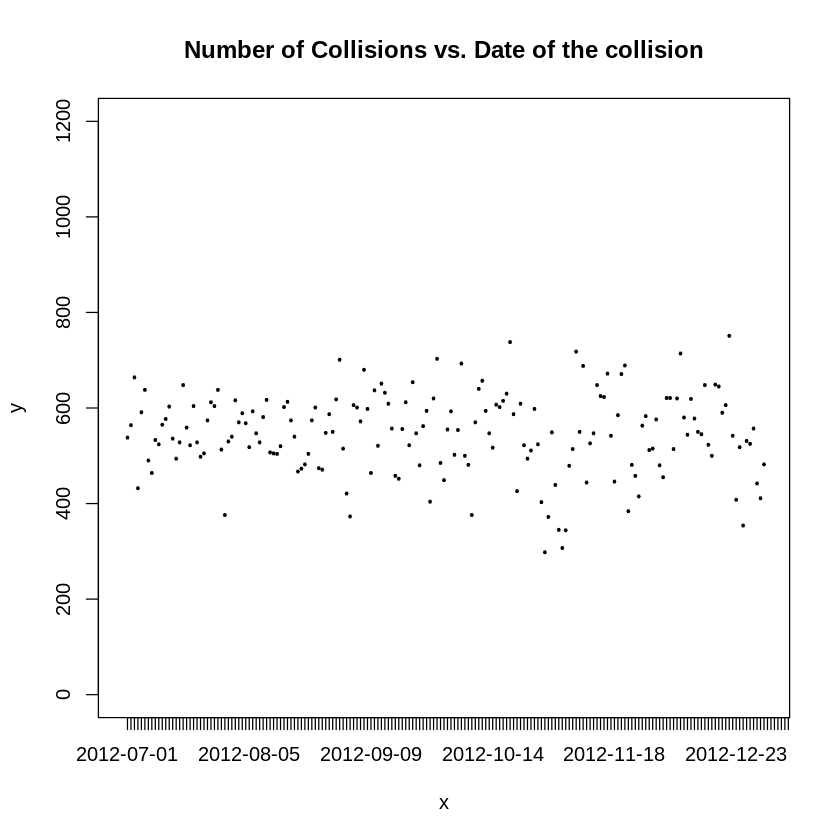

In [216]:
plot(totalcolscollated$collision_date[0:184], totalcolscollated$NUM_COLLISIONS[0:184], main="Number of Collisions vs. Date of the collision", xlim=c(0, 184), ylim=c(0,1200))

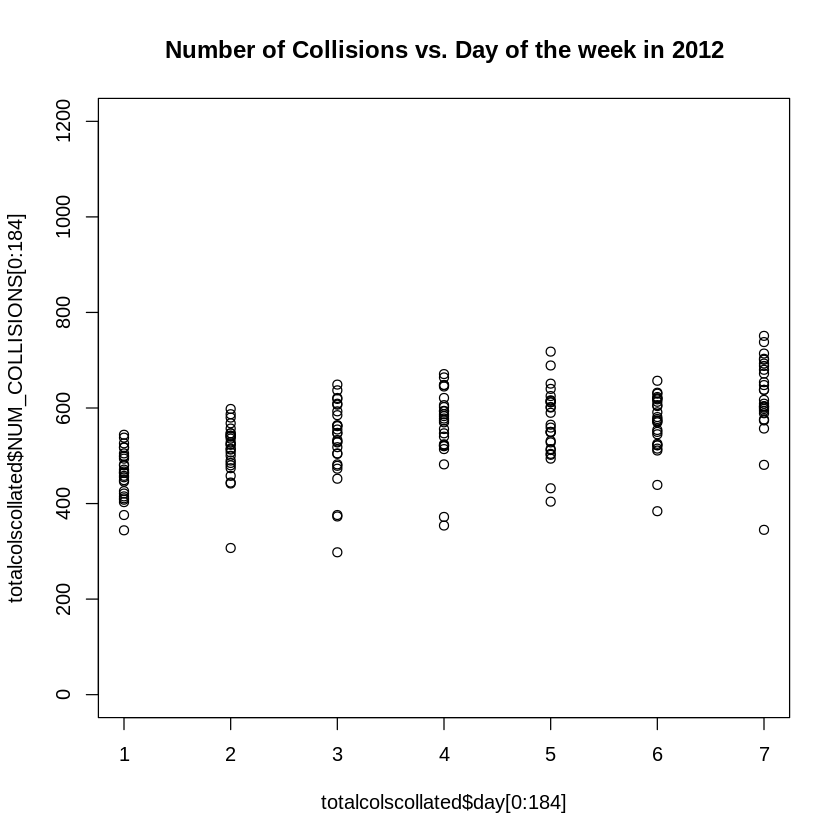

In [217]:
plot(totalcolscollated$day[0:184], totalcolscollated$NUM_COLLISIONS[0:184], main="Number of Collisions vs. Day of the week in 2012", ylim=c(0,1200))

In [218]:
summary(totalcolscollated$NUM_COLLISIONS[0:184])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.0   500.0   548.5   546.4   604.5   751.0 

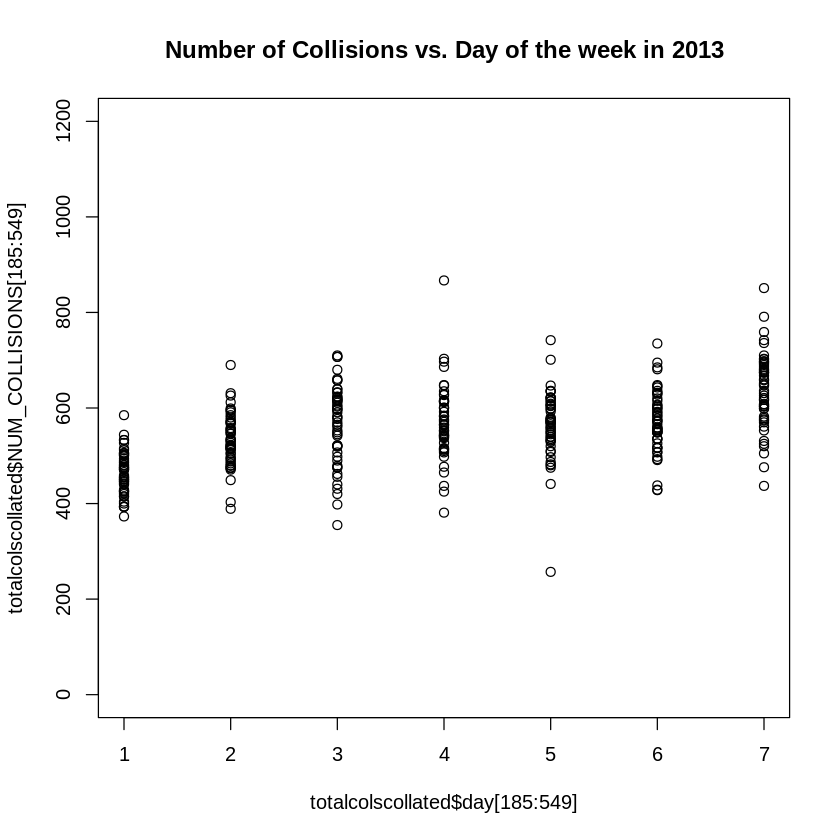

In [219]:
plot(totalcolscollated$day[185:549], totalcolscollated$NUM_COLLISIONS[185:549], main="Number of Collisions vs. Day of the week in 2013", ylim=c(0,1200))

In [220]:
summary(totalcolscollated$NUM_COLLISIONS[185:549])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

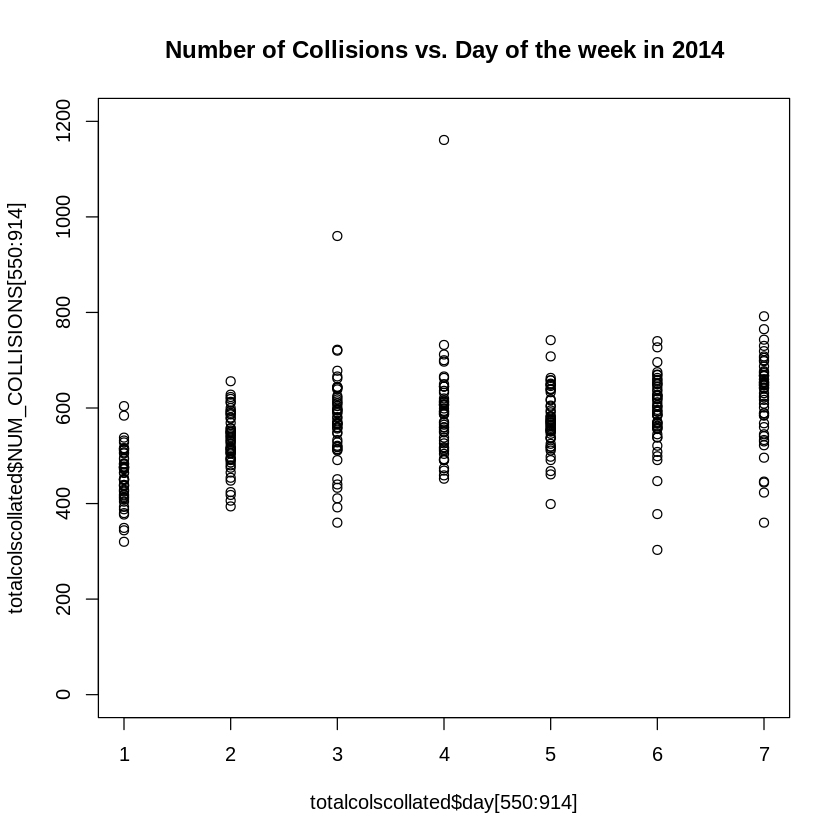

In [221]:
plot(totalcolscollated$day[550:914], totalcolscollated$NUM_COLLISIONS[550:914], main="Number of Collisions vs. Day of the week in 2014", ylim=c(0,1200))

In [222]:
summary(totalcolscollated$NUM_COLLISIONS[550:973])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   504.8   564.0   561.0   621.0  1161.0 

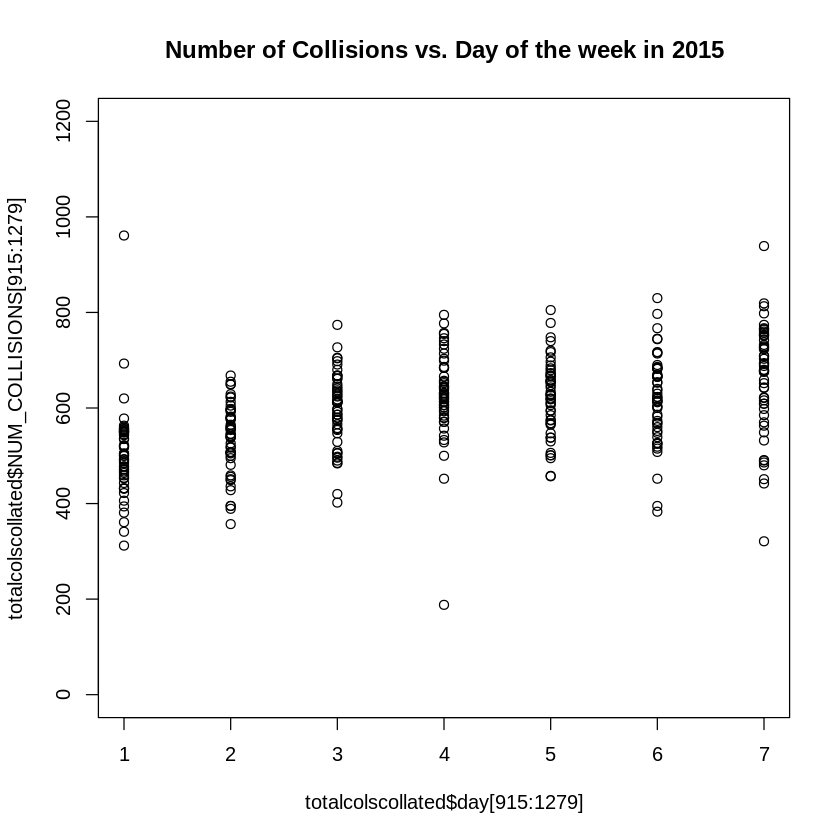

In [223]:
plot(totalcolscollated$day[915:1279], totalcolscollated$NUM_COLLISIONS[915:1279], main="Number of Collisions vs. Day of the week in 2015", ylim=c(0,1200))

In [224]:
summary(totalcolscollated$NUM_COLLISIONS[915:1279])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

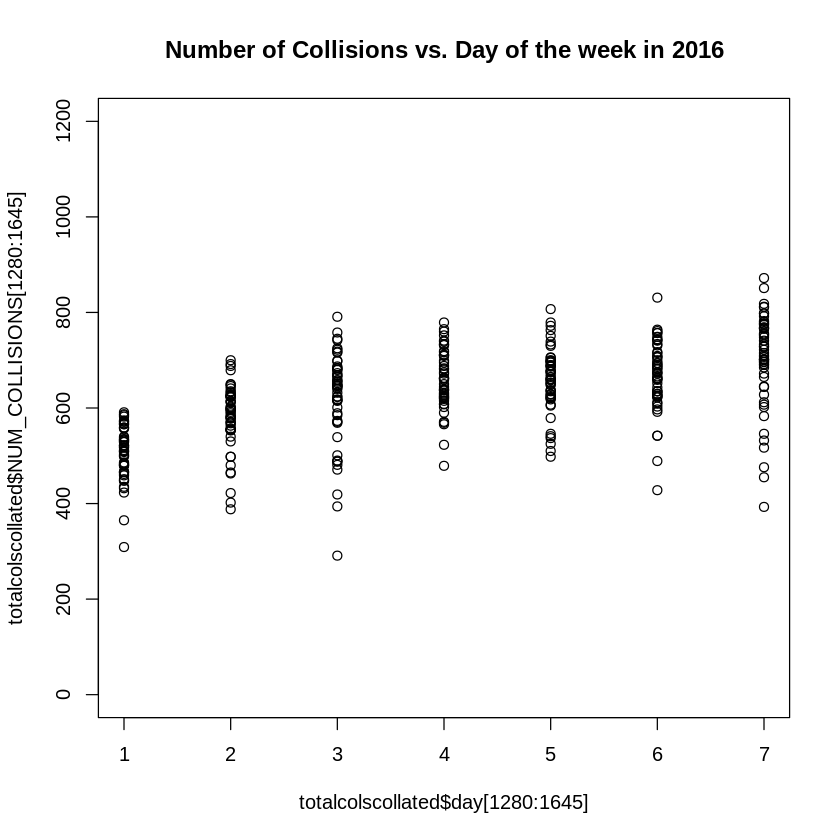

In [225]:
plot(totalcolscollated$day[1280:1645], totalcolscollated$NUM_COLLISIONS[1280:1645], main="Number of Collisions vs. Day of the week in 2016", ylim=c(0,1200))

In [226]:
summary(totalcolscollated$NUM_COLLISIONS[1280:1645])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

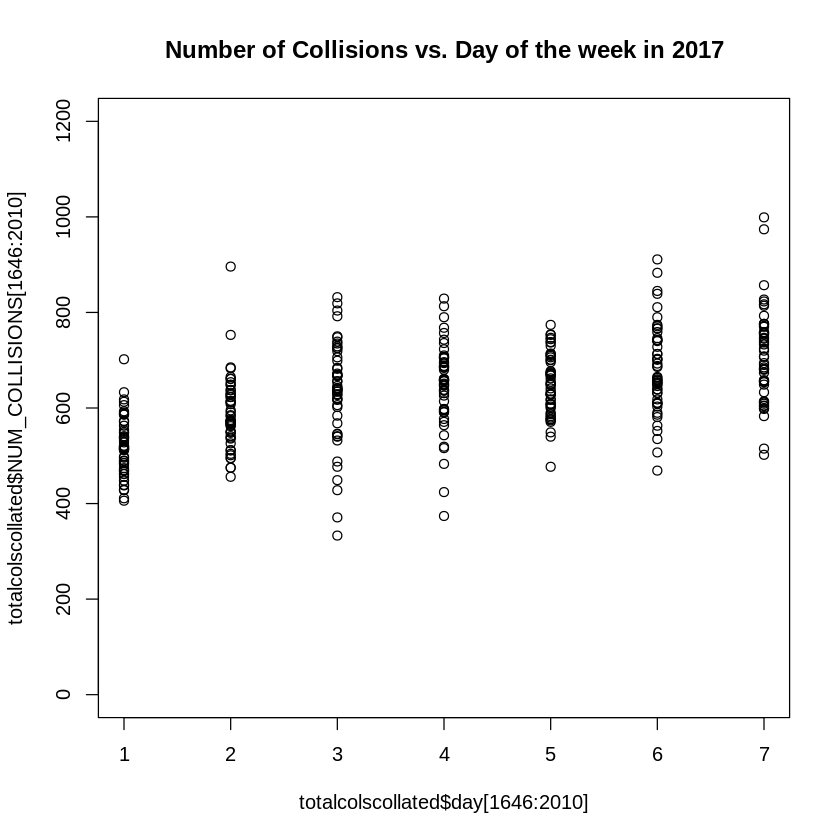

In [227]:
plot(totalcolscollated$day[1646:2010], totalcolscollated$NUM_COLLISIONS[1646:2010], main="Number of Collisions vs. Day of the week in 2017", ylim=c(0,1200))

In [228]:
summary(totalcolscollated$NUM_COLLISIONS[1646:2010])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

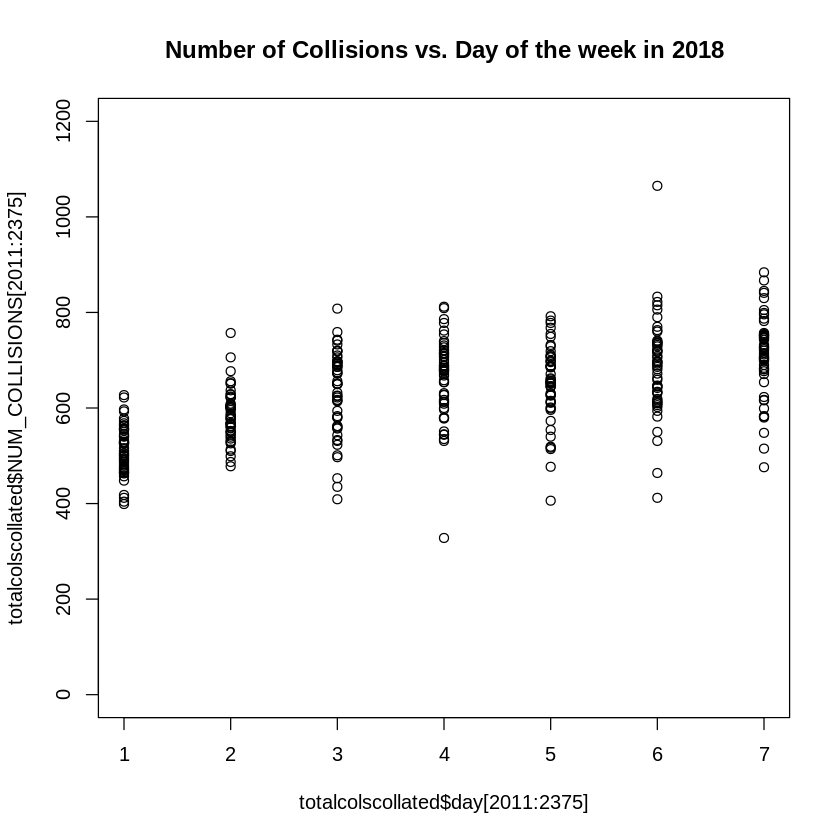

In [229]:
plot(totalcolscollated$day[2011:2375], totalcolscollated$NUM_COLLISIONS[2011:2375], main="Number of Collisions vs. Day of the week in 2018", ylim=c(0,1200))

In [230]:
summary(totalcolscollated$NUM_COLLISIONS[2011:2375])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

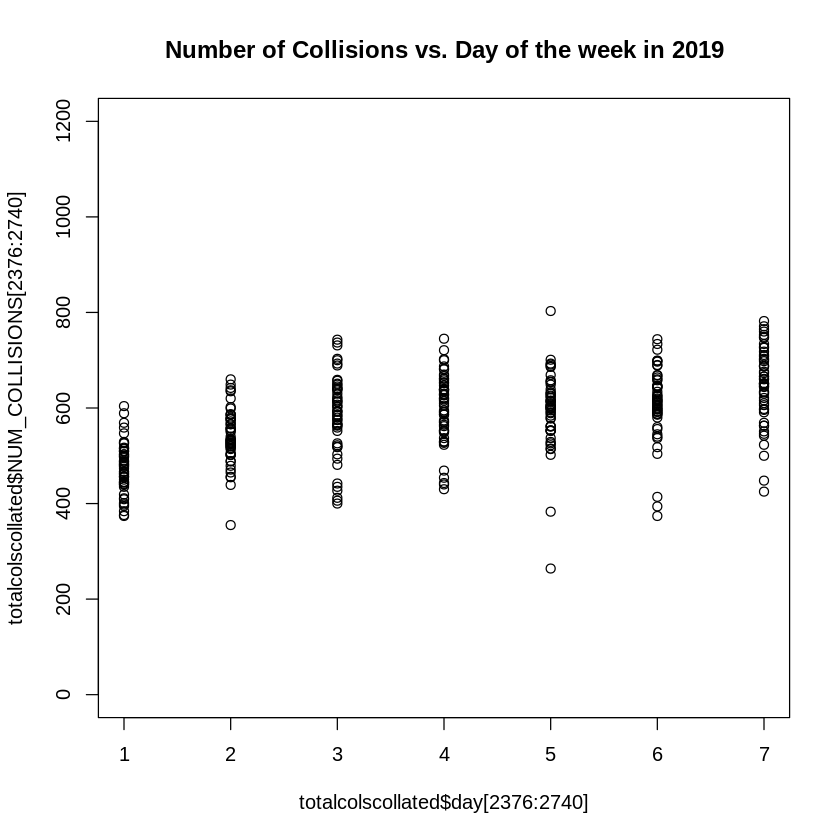

In [231]:
plot(totalcolscollated$day[2376:2740], totalcolscollated$NUM_COLLISIONS[2376:2740], main="Number of Collisions vs. Day of the week in 2019", ylim=c(0,1200))

In [232]:
summary(totalcolscollated$NUM_COLLISIONS[2376:2740])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

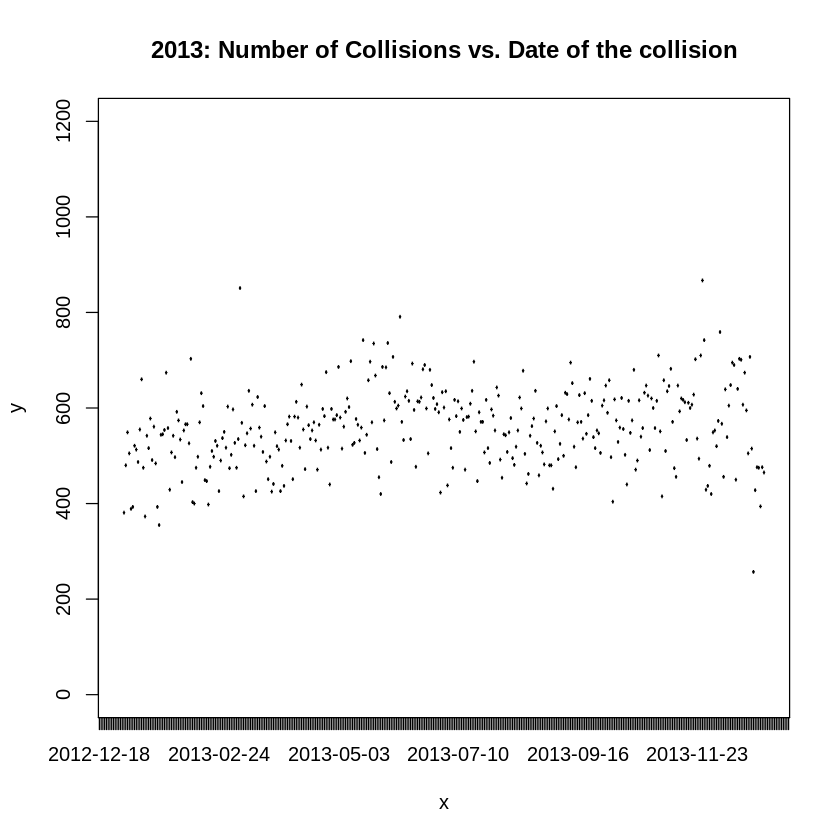

In [233]:
plot(totalcolscollated$collision_date[185:549], totalcolscollated$NUM_COLLISIONS[185:549], main="2013: Number of Collisions vs. Date of the collision", xlim=c(185, 549), ylim=c(0,1200))

The number of collisions fluctuates significantly over time, with clear peaks and troughs. This suggests that the frequency of collisions varies by day, potentially indicating specific time periods with higher accident rates.
The plot suggests that the number of collisions varies significantly over time.

In [234]:
summary(totalcolscollated$NUM_COLLISIONS[185:549])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

In [235]:
cor(totalcolscollated$temp[185:549], totalcolscollated$NUM_COLLISIONS[185:549])

[1] 0.2064329

 This positive correlation is relatively weak, indicating a slight association between temperature and the number of collisions in 2013 dataset.
 A correlation of 0.2064 implies that as temperature increases, there is a very modest increase in the number of collisions. However, this relationship is weak, meaning that temperature alone does not strongly determine or predict the number of collisions.

 The weak linear correlation suggests that if there is a relationship between temperature and collisions, it may not be a straightforward linear one. For instance, extreme temperatures (very high or very low) might impact collision rates more than moderate temperatures, leading to a pattern that a linear correlation does not capture effectively.

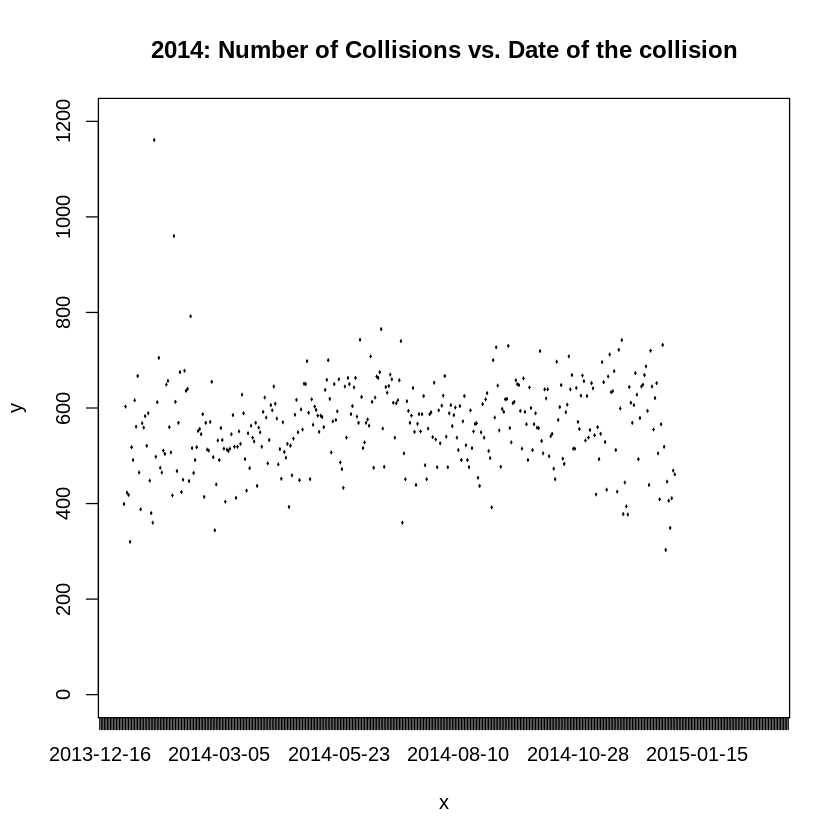

In [236]:
plot(totalcolscollated$collision_date[550:914], totalcolscollated$NUM_COLLISIONS[550:914], main="2014: Number of Collisions vs. Date of the collision", xlim=c(550, 973), ylim=c(0,1200))

In [237]:
summary(totalcolscollated$NUM_COLLISIONS[550:914])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   568.0   564.5   623.0  1161.0 

The plot demonstrates fluctuations in the daily collision count throughout the selected dates in 2014. There are periodic peaks and dips, indicating that the frequency of collisions is not constant and varies with certain days or periods.

In [238]:
cor(totalcolscollated$temp[550:914], totalcolscollated$NUM_COLLISIONS[550:914])

[1] 0.1434866

A correlation of 0.1435 is almost negligible, suggesting that temperature has minimal influence on the number of collisions within this period (2014). This low value implies that there is no meaningful linear relationship between the two variables.

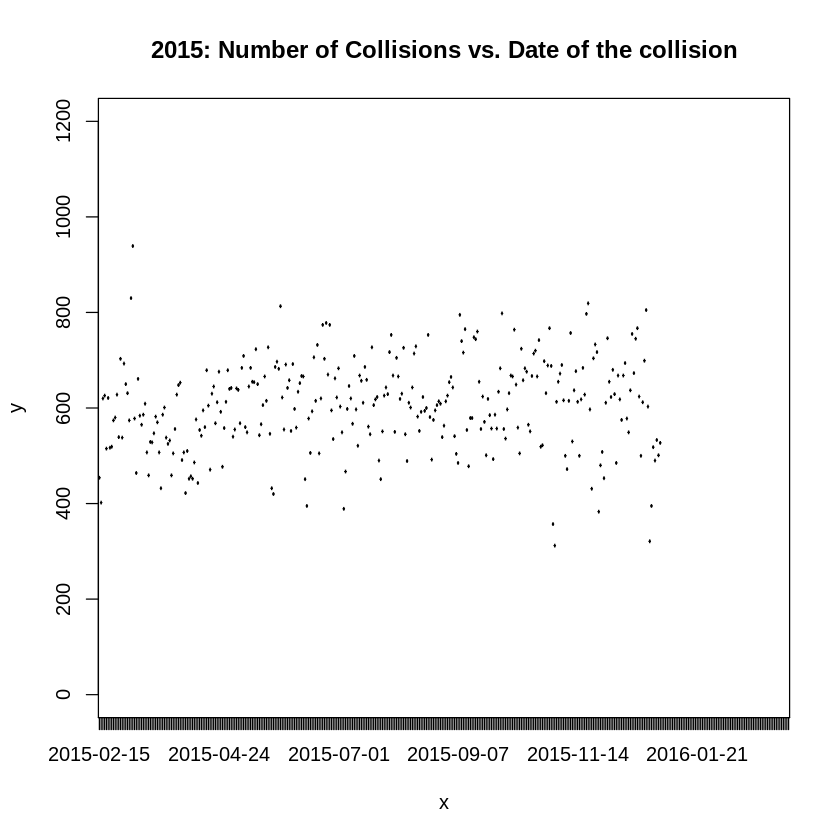

In [239]:
plot(totalcolscollated$collision_date[915:1279], totalcolscollated$NUM_COLLISIONS[915:1279], main="2015: Number of Collisions vs. Date of the collision", xlim=c(974, 1338), ylim=c(0,1200))

The plot shows recurring fluctuations in the daily number of collisions, with visible peaks and troughs. This pattern suggests periodic influences on collision rates, potentially linked to specific days, events, or seasonal factors that impact road safety.

In [240]:
summary(totalcolscollated$NUM_COLLISIONS[915:1279])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

In [241]:
cor(totalcolscollated$temp[915:1279], totalcolscollated$NUM_COLLISIONS[915:1279])

[1] 0.2344425

 The correlation of 0.2344 is weak but positive suggesting that temperature might have some impact on collision frequency. There is a slight tendency for collisions to increase as temperature rises. However, this relationship is not strong enough to suggest that temperature is a major driver of collision frequency in 2015.

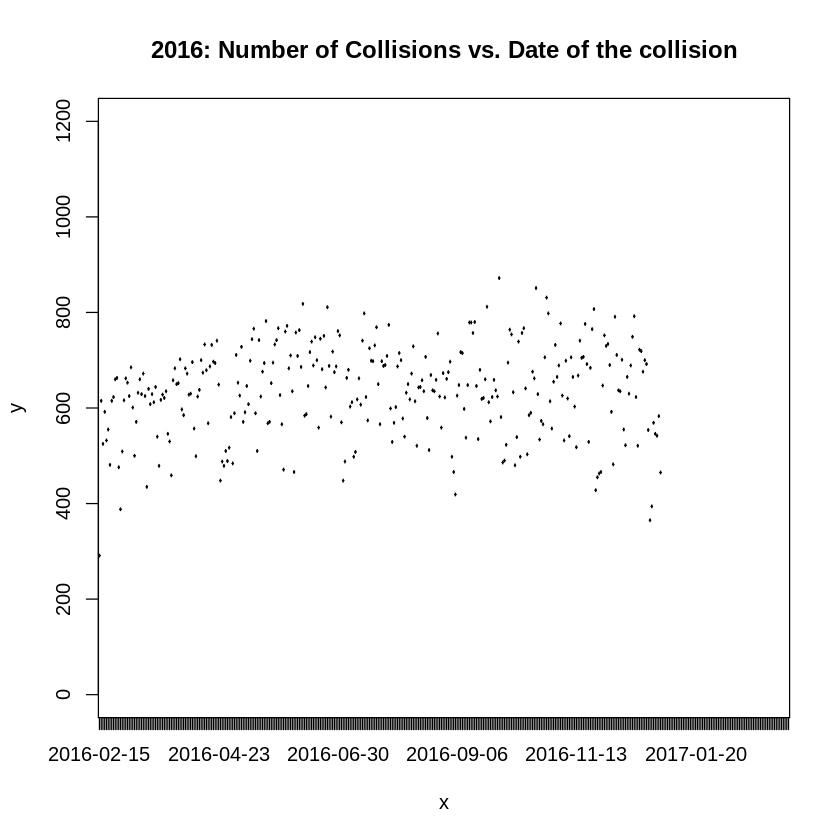

In [242]:
plot(totalcolscollated$collision_date[1280:1645], totalcolscollated$NUM_COLLISIONS[1280:1645], main="2016: Number of Collisions vs. Date of the collision", xlim=c(1339,1704), ylim=c(0,1200))

The plot shows noticeable fluctuations in the number of daily collisions, with periodic peaks and valleys. This variability suggests that certain days or periods experience higher collision counts, potentially due to factors such as weekend activity, holidays, or specific seasonal influences.

In [243]:
summary(totalcolscollated$NUM_COLLISIONS[1280:1645])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

In [244]:
cor(totalcolscollated$temp[1280:1645], totalcolscollated$NUM_COLLISIONS[1280:1645])

[1] 0.2739325

The correlation of 0.2739 suggests a modest tendency for the number of collisions to increase as temperature rises. However, the relationship is not strong, indicating that temperature alone is not a dominant factor affecting collision frequency.
Given the weak to moderate correlation, it is possible that the relationship between temperature and collision frequency is not strictly linear.

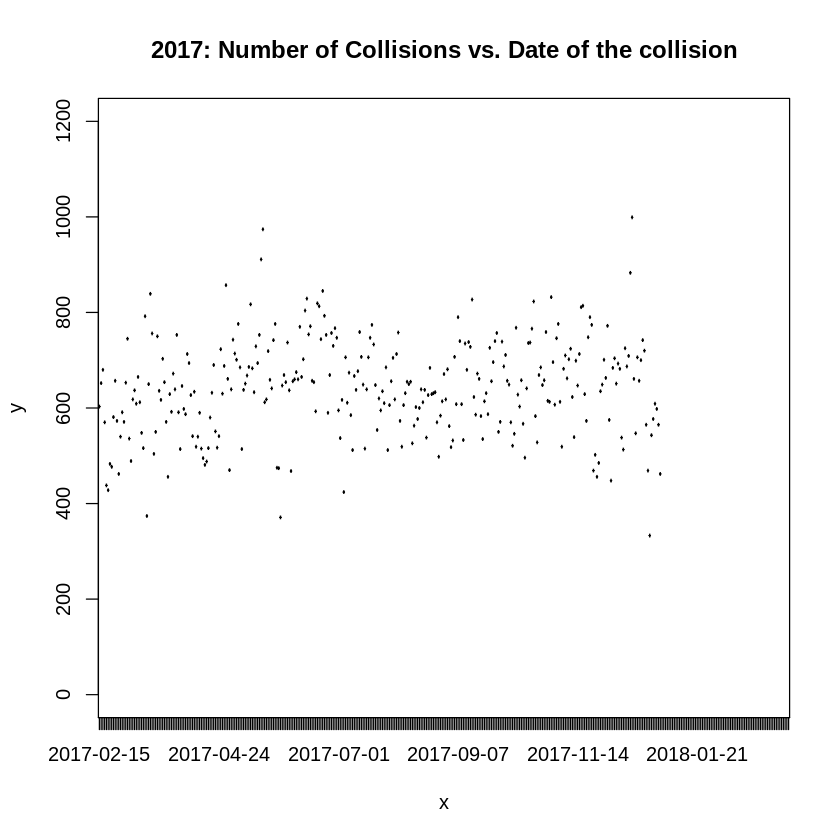

In [245]:
plot(totalcolscollated$collision_date[1646:2010], totalcolscollated$NUM_COLLISIONS[1646:2010], main="2017: Number of Collisions vs. Date of the collision", xlim=c(1705, 2069), ylim=c(0,1200))

In [246]:
summary(totalcolscollated$NUM_COLLISIONS[1646:2010])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

In [247]:
cor(totalcolscollated$temp[1646:2010], totalcolscollated$NUM_COLLISIONS[1646:2010])

[1] 0.2227263

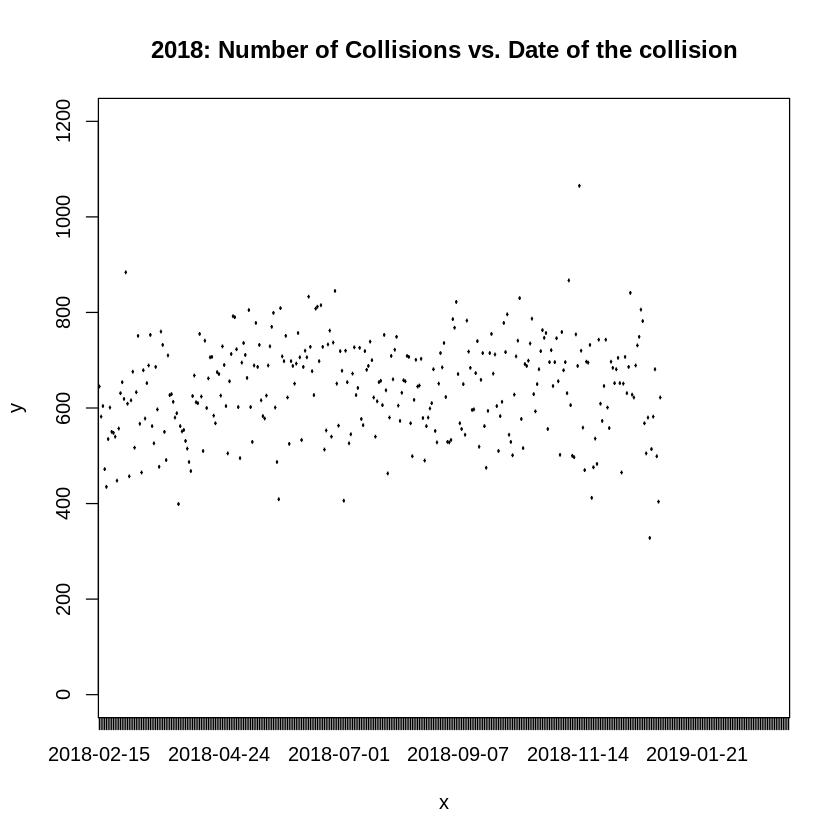

In [248]:
plot(totalcolscollated$collision_date[2011:2375], totalcolscollated$NUM_COLLISIONS[2011:2375], main="2018: Number of Collisions vs. Date of the collision", xlim=c(2070, 2434), ylim=c(0,1200))

In [249]:
summary(totalcolscollated$NUM_COLLISIONS[2011:2375])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

In [250]:
cor(totalcolscollated$temp[2011:2375], totalcolscollated$NUM_COLLISIONS[2011:2375])

[1] 0.2524512

The correlation of 0.2525 suggests a slight tendency for the number of collisions to increase as temperature rises. However, this relationship is weak, meaning that temperature is not a strong predictor of collision frequency in this dataset.

Temperature may contribute to an increase in collision rates under certain conditions, but it is not a dominant factor in isolation.

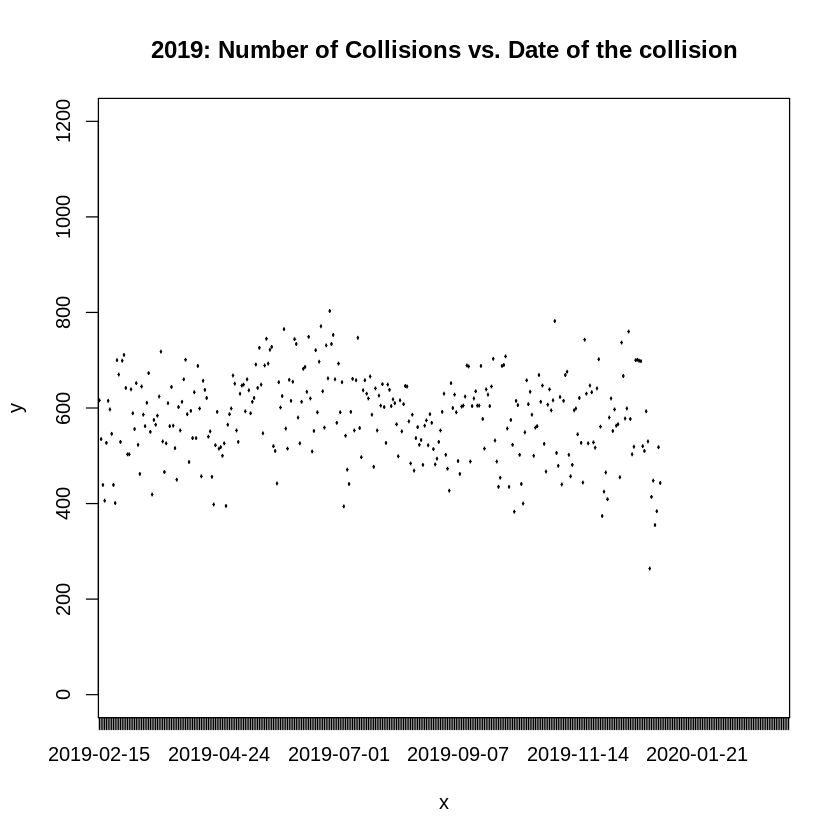

In [251]:
plot(totalcolscollated$collision_date[2376:2740], totalcolscollated$NUM_COLLISIONS[2376:2740], main="2019: Number of Collisions vs. Date of the collision", xlim=c(2435, 2799), ylim=c(0,1200))

In [252]:
summary(totalcolscollated$NUM_COLLISIONS[2376:2740])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

In [253]:
cor(totalcolscollated$temp[2376:2740], totalcolscollated$NUM_COLLISIONS[2376:2740])

[1] 0.145116

In [254]:
head(totalcolscollated)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,538
2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,564
3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,664
4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,432
5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,591
6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,638


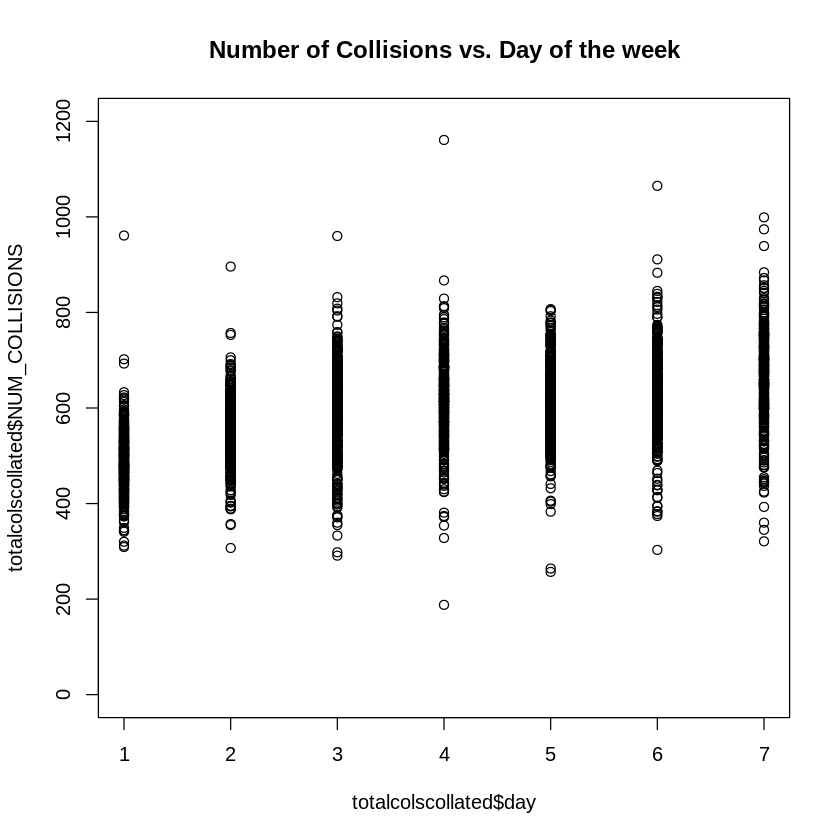

In [255]:
plot(totalcolscollated$day, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week",  ylim=c(0,1200))

This shows the distribution of the number of collisions across different days of the week.
The plot demonstrates variations in the number of collisions across different days. A pattern of peaks and dips is expected, where certain days have consistently higher collision rates than others. This could suggest that specific days are associated with more frequent collisions, possibly due to changes in traffic volume or driver behaviour.

In [256]:
cor(totalcolscollated$day, totalcolscollated$NUM_COLLISIONS)

[1] 0.497619

The correlation of 0.4976 suggests that there is a moderate tendency for the number of collisions to vary depending on the day of the week. This implies that the day of the week does have a notable influence on collision frequency, though it is not a perfectly linear relationship.

This moderate positive correlation indicates that certain days are associated with a rise or fall in collision counts. The day of the week could influence traffic dynamics significantly enough to impact collision rates.

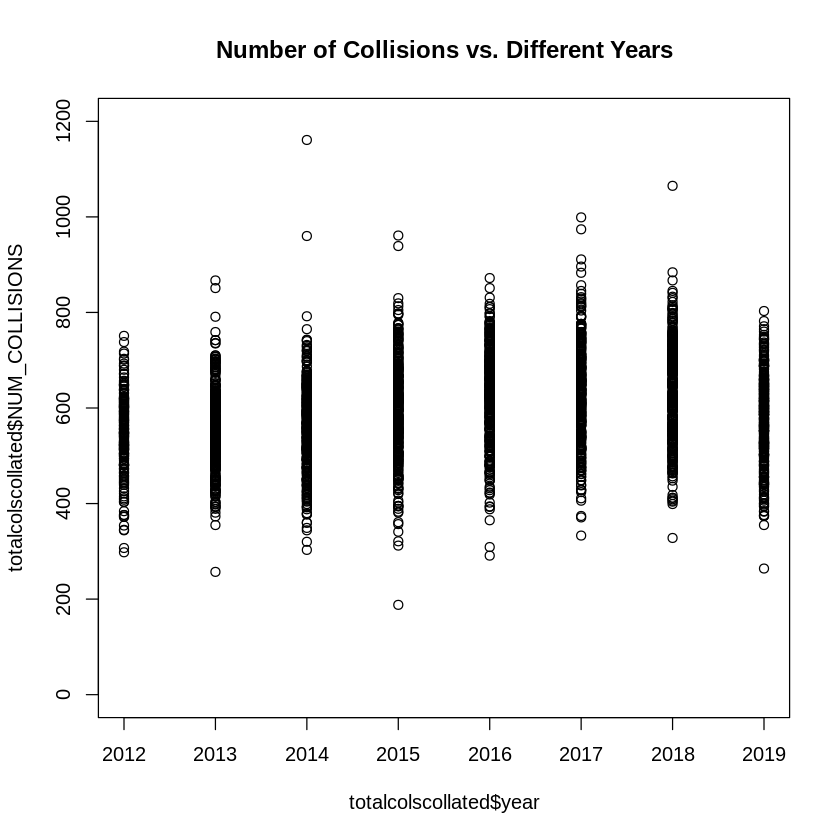

In [257]:
plot(totalcolscollated$year, totalcolscollated$NUM_COLLISIONS, main="Number of Collisions vs. Different Years",  ylim=c(0,1200))

 The plot shows how the number of collisions varies across different years. Given the weak correlation, we would expect the plot to reveal some minor upward or fluctuating trend but not a clear, strong increase or decrease.

There might be visible peaks and dips in specific years, indicating that certain years had higher collision rates than others. This could suggest that while there might be a slight increase over time, the year alone is not a strong predictor of the number of collisions.

In [258]:
cor(totalcolscollated$year, totalcolscollated$NUM_COLLISIONS)

[1] 0.2073726

The weak correlation indicates a minor tendency for collisions to increase slightly with each year, but the relationship is not strong. This suggests that time (in terms of year) is not a significant predictor of the number of collisions.

Here, let us check the number of collisions according to the years and use the year with the highest number of mean for specialised analysis.

In [259]:
summary(totalcolscollated$NUM_COLLISIONS[0:184], "2012")


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  298.0   500.0   548.5   546.4   604.5   751.0 

In [260]:
summary(totalcolscollated$NUM_COLLISIONS[185:549], "2013")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  257.0   505.0   558.0   558.2   613.0   867.0 

In [261]:
summary(totalcolscollated$NUM_COLLISIONS[550:914], "2014")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   568.0   564.5   623.0  1161.0 

In [262]:
summary(totalcolscollated$NUM_COLLISIONS[915:1279], "2015")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  188.0   532.0   601.0   596.4   666.0   961.0 

In [263]:
summary(totalcolscollated$NUM_COLLISIONS[1280:1645], "2016")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  291.0   568.2   635.0   628.0   696.8   872.0 

In [264]:
summary(totalcolscollated$NUM_COLLISIONS[1646:2010], "2017")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   570.0   636.0   632.9   700.0   999.0 

In [265]:
summary(totalcolscollated$NUM_COLLISIONS[2011:2375], "2018")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   634.0   634.4   706.0  1065.0 

In [266]:
summary(totalcolscollated$NUM_COLLISIONS[2376:2740], "2019")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  264.0   522.0   589.0   579.4   641.0   803.0 

Let's split up the data by year again and add a dayindex (1 to 365) and dayofyear(1 to 184 for 2012, 185 to 549 for 2013, 550 to 914 for 2014 etc).
In the dataset, 2012 is only half a year entry so we don't have 365 days for 2012 instead we have 184 days (from 1st July to 31 December).

In [267]:
ttccsplitcheck <- totalcolscollated

In [268]:
ttcc2012 <- ttccsplitcheck[which(ttccsplitcheck$year == 2012), ]

In [269]:
dayofyear <- 1*seq_len(nrow(ttcc2012))
dayindex <- 1*seq_len(nrow(ttcc2012))
ttcc2012a <- cbind(dayindex, dayofyear, ttcc2012)

In [270]:
ttcc2013 <- ttccsplitcheck[which(ttccsplitcheck$year == 2013), ]

In [271]:
dayofyear <- 1*seq_len(nrow(ttcc2013))
dayindex <- 1*seq_len(nrow(ttcc2013)) + 184
ttcc2013a <- cbind(dayindex, dayofyear, ttcc2013)

In [272]:
ttcc2014 <- ttccsplitcheck[which(ttccsplitcheck$year == 2014), ]

In [273]:
dayofyear <- 1*seq_len(nrow(ttcc2014))
dayindex <- 1*seq_len(nrow(ttcc2014)) + 549
ttcc2014a <- cbind(dayindex, dayofyear, ttcc2014)

In [274]:
ttcc2015 <- ttccsplitcheck[which(ttccsplitcheck$year == 2015), ]

In [275]:
dayofyear <- 1*seq_len(nrow(ttcc2015))
dayindex <- 1*seq_len(nrow(ttcc2015)) +914
ttcc2015a <- cbind(dayindex, dayofyear, ttcc2015)

In [276]:
ttcc2016 <- ttccsplitcheck[which(ttccsplitcheck$year == 2016), ]

In [277]:
dayofyear <- 1*seq_len(nrow(ttcc2016))
dayindex <- 1*seq_len(nrow(ttcc2016)) +1279
ttcc2016a <- cbind(dayindex, dayofyear, ttcc2016)

In [278]:
ttcc2017 <- ttccsplitcheck[which(ttccsplitcheck$year == 2017), ]

In [279]:
dayofyear <- 1*seq_len(nrow(ttcc2017))
dayindex <- 1*seq_len(nrow(ttcc2017)) +1645
ttcc2017a <- cbind(dayindex, dayofyear, ttcc2017)

In [280]:
ttcc2018 <- ttccsplitcheck[which(ttccsplitcheck$year == 2018), ]

In [281]:
dayofyear <- 1*seq_len(nrow(ttcc2018))
dayindex <- 1*seq_len(nrow(ttcc2018)) + 2010
ttcc2018a <- cbind(dayindex, dayofyear, ttcc2018)

In [282]:
ttcc2019 <- ttccsplitcheck[which(ttccsplitcheck$year == 2019), ]

In [283]:
dayofyear <- 1*seq_len(nrow(ttcc2019))
dayindex <- 1*seq_len(nrow(ttcc2019)) + 2375
ttcc2019a <- cbind(dayindex, dayofyear, ttcc2019)

Now, let us have a look at the number of collisions on each day of the year for all 8 and a half (9 years) years on top of each other.
We are doing this to see if the spread of the data and yearly pattern are similar.

In [284]:
library(ggplot2)

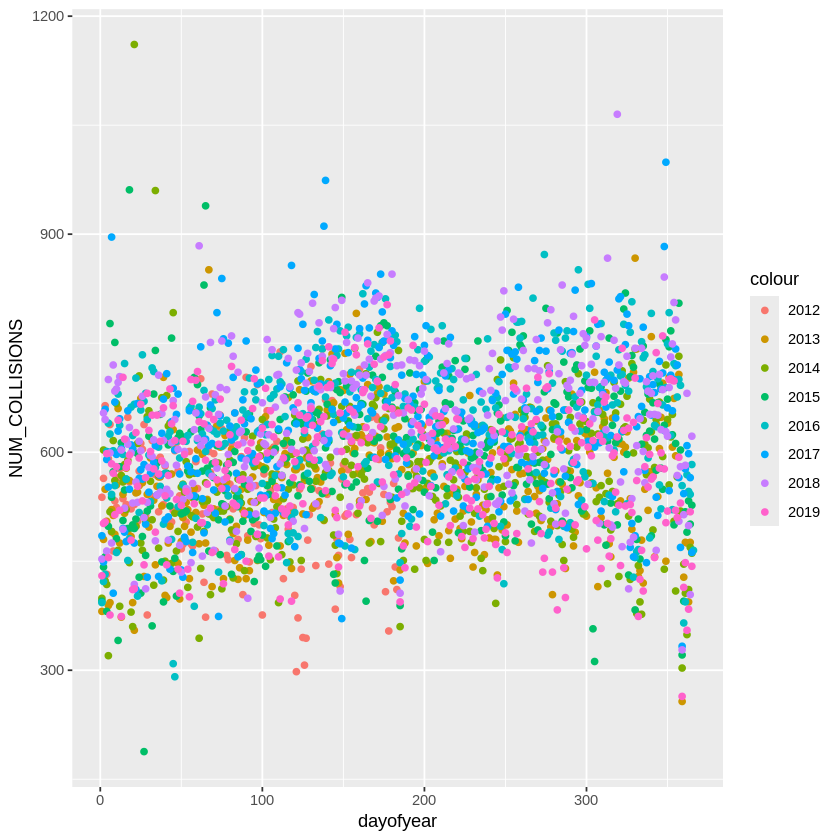

In [285]:
ggplot() +
  geom_point(data=ttcc2012a, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ttcc2013a, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ttcc2014a, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ttcc2015a, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ttcc2016a, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ttcc2017a, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ttcc2018a, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ttcc2019a, aes(dayofyear, NUM_COLLISIONS, color="2019"))

This scatter plot reveals that daily collision counts are fairly consistent year over year, with most counts concentrated between 400 and 900 and only occasional outliers reaching higher values. There is a slight spread in collisions around mid-year, possibly hinting at a seasonal influence, though this effect is subtle. The consistency across years implies that no significant year-over-year changes affected collision patterns, and that collisions are likely influenced more by daily or situational factors rather than strong seasonal or yearly trends.

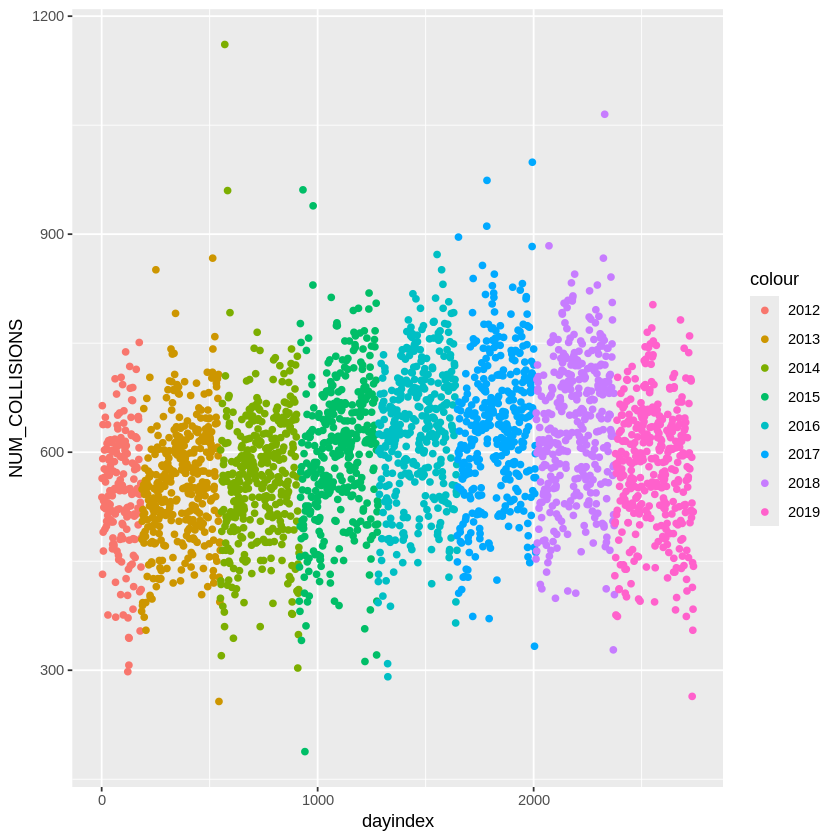

In [286]:
ggplot() +
  geom_point(data=ttcc2012a, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ttcc2013a, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ttcc2014a, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ttcc2015a, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ttcc2016a, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ttcc2017a, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ttcc2018a, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ttcc2019a, aes(dayindex, NUM_COLLISIONS, color="2019"))

The scatter plot indicates a subtle upward trend in daily collision counts over the years, with more days in recent years experiencing higher collision counts. The majority of daily collision counts fall within a moderate range of 400 to 900, with occasional outliers in the later years reaching above 1000. The consistent distribution across the day index, without strong seasonal patterns, implies that annual and event-specific factors may be more impactful than seasonal changes in influencing collision counts.

In [287]:
ttcc2012b <- ttcc2012a[which(ttcc2012a$NUM_COLLISIONS >= 300), ]
ttcc2013b <- ttcc2013a[which(ttcc2013a$NUM_COLLISIONS >= 300), ]
ttcc2014b <- ttcc2014a[which(ttcc2014a$NUM_COLLISIONS >= 300), ]
ttcc2015b <- ttcc2015a[which(ttcc2015a$NUM_COLLISIONS >= 300), ]
ttcc2016b <- ttcc2016a[which(ttcc2016a$NUM_COLLISIONS >= 300), ]
ttcc2017b <- ttcc2017a[which(ttcc2017a$NUM_COLLISIONS >= 300), ]
ttcc2018b <- ttcc2018a[which(ttcc2018a$NUM_COLLISIONS >= 300), ]
ttcc2019b <- ttcc2019a[which(ttcc2019a$NUM_COLLISIONS >= 300), ]

ttcc2012c <- ttcc2012b[which(ttcc2012b$NUM_COLLISIONS <= 850), ]
ttcc2013c <- ttcc2013b[which(ttcc2013b$NUM_COLLISIONS <= 850), ]
ttcc2014c <- ttcc2014b[which(ttcc2014b$NUM_COLLISIONS <= 850), ]
ttcc2015c <- ttcc2015b[which(ttcc2015b$NUM_COLLISIONS <= 850), ]
ttcc2016c <- ttcc2016b[which(ttcc2016b$NUM_COLLISIONS <= 850), ]
ttcc2017c <- ttcc2017b[which(ttcc2017b$NUM_COLLISIONS <= 850), ]
ttcc2018c <- ttcc2018b[which(ttcc2018b$NUM_COLLISIONS <= 850), ]
ttcc2019c <- ttcc2019b[which(ttcc2019b$NUM_COLLISIONS <= 850), ]




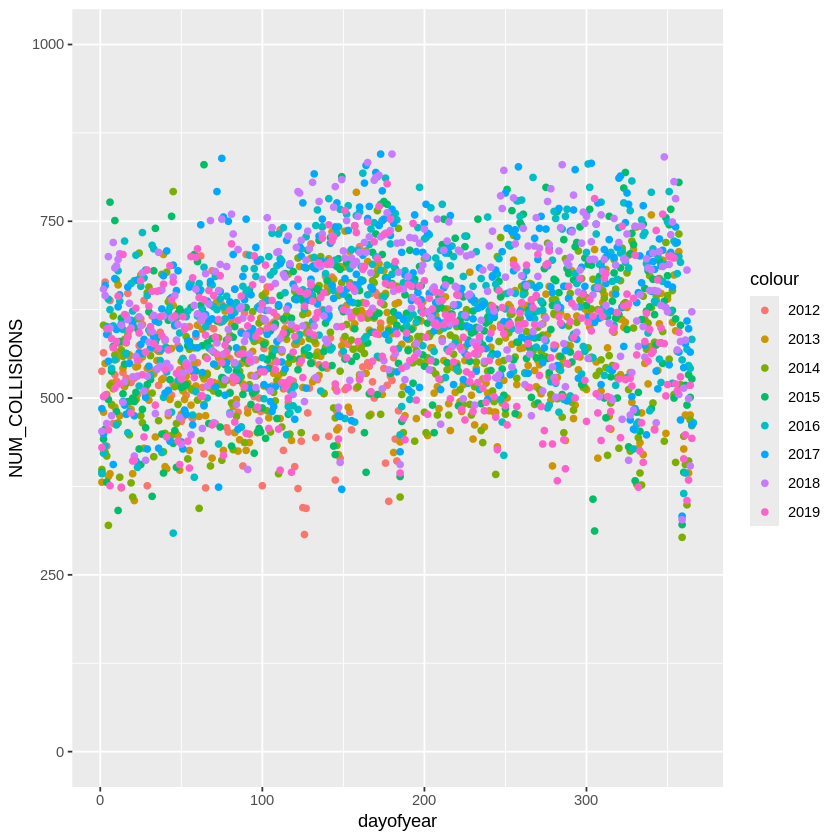

In [288]:
sp <- ggplot() +
  geom_point(data = ttcc2012c, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data = ttcc2013c, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data = ttcc2014c, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data = ttcc2015c, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data = ttcc2016c, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data = ttcc2017c, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data = ttcc2018c, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data = ttcc2019c, aes(dayofyear, NUM_COLLISIONS, color="2019"))

sp + ylim(0, 1000)

This scatter plot reveals that daily collision counts are fairly consistent throughout the year across all years from 2012 to 2019, with most values clustered between 400 and 800. There are few outliers above 800 and below 300, indicating specific days with significantly different traffic conditions. The absence of a strong seasonal trend or cyclical pattern suggests that daily variations in collisions are not strongly influenced by the time of year.

SUMMARY OF THE NUMBER OF COLLISIONS

In [289]:
summary(ttcc2012c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  307.0   501.0   549.0   547.8   605.0   751.0 

In [290]:
summary(ttcc2013c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  355.0   505.0   557.5   557.4   612.8   791.0 

In [291]:
summary(ttcc2014c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  303.0   510.0   567.0   561.8   622.0   792.0 

In [292]:
summary(ttcc2015c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  312.0   532.2   601.0   595.6   665.8   830.0 

In [293]:
summary(ttcc2016c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  309.0   568.5   635.0   627.6   695.5   831.0 

In [294]:
summary(ttcc2017c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  333.0   567.5   634.0   628.1   694.0   845.0 

In [295]:
summary(ttcc2018c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  328.0   562.0   632.5   631.9   705.8   845.0 

In [296]:
summary(ttcc2019c$NUM_COLLISIONS)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  355.0   522.0   589.0   580.3   641.2   803.0 

We will normalise the data here:

In [297]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2012c$NUM_COLLISIONS <- ttcc2012c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2012c$NUM_COLLISIONS <- normalize(ttcc2012c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2012c$NUM_COLLISIONS)

  [1] 0.52027027 0.57882883 0.80405405 0.28153153 0.63963964 0.74549550
  [7] 0.41216216 0.35360360 0.50900901 0.48873874 0.58108108 0.60810811
 [13] 0.66666667 0.51576577 0.42117117 0.49774775 0.76801802 0.56756757
 [19] 0.48423423 0.66891892 0.49774775 0.43018018 0.44594595 0.60135135
 [25] 0.68693694 0.66891892 0.74549550 0.46396396 0.15540541 0.50225225
 [31] 0.52477477 0.69594595 0.59234234 0.63513514 0.58783784 0.47522523
 [37] 0.64414414 0.54054054 0.49774775 0.61711712 0.69819820 0.45045045
 [43] 0.44594595 0.44369369 0.47972973 0.66441441 0.68918919 0.60135135
 [49] 0.52477477 0.36036036 0.37387387 0.39414414 0.44369369 0.60135135
 [55] 0.66216216 0.37612613 0.36936937 0.54279279 0.63063063 0.54729730
 [61] 0.70045045 0.88738739 0.46846847 0.25675676 0.14864865 0.67342342
 [67] 0.66216216 0.59684685 0.84009009 0.65540541 0.35360360 0.74324324
 [73] 0.48198198 0.77477477 0.73198198 0.68018018 0.56306306 0.34009009
 [79] 0.32657658 0.56081081 0.68693694 0.48423423 0.78153153 0.5

In [298]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2013c$NUM_COLLISIONS <- ttcc2013c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2013c$NUM_COLLISIONS <- normalize(ttcc2013c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2013c$NUM_COLLISIONS)

  [1] 0.05963303 0.28669725 0.44495413 0.34403670 0.07798165 0.08715596
  [7] 0.38073394 0.36238532 0.30275229 0.45871560 0.69954128 0.27522936
 [13] 0.04128440 0.42889908 0.36926606 0.51146789 0.31192661 0.47247706
 [19] 0.29587156 0.08715596 0.00000000 0.43348624 0.43577982 0.45642202
 [25] 0.73165138 0.46559633 0.16972477 0.34862385 0.42889908 0.32568807
 [31] 0.54357798 0.50229358 0.41055046 0.20642202 0.45412844 0.48394495
 [37] 0.48394495 0.39220183 0.79816514 0.11009174 0.10321101 0.27522936
 [43] 0.32798165 0.49311927 0.63302752 0.57110092 0.21559633 0.21100917
 [49] 0.09862385 0.27981651 0.35550459 0.32798165 0.40366972 0.38073394
 [55] 0.16284404 0.30963303 0.41743119 0.44724771 0.37155963 0.56880734
 [61] 0.27293578 0.33715596 0.55504587 0.39449541 0.27522936 0.41284404
 [67] 0.49082569 0.13761468 0.38302752 0.44036697 0.64449541 0.46330275
 [73] 0.57798165 0.38073394 0.16284404 0.61467890 0.46788991 0.42431193
 [79] 0.35091743 0.57110092 0.30504587 0.22018349 0.32798165 0.1

In [299]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2014c$NUM_COLLISIONS <- ttcc2014c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2014c$NUM_COLLISIONS <- normalize(ttcc2014c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2014c$NUM_COLLISIONS)

  [1] 0.19631902 0.61349693 0.24539877 0.23517382 0.03476483 0.43967280
  [7] 0.38445808 0.64008180 0.52760736 0.74437628 0.33128834 0.17382413
 [13] 0.54192229 0.52351738 0.57259714 0.44580777 0.58486708 0.29652352
 [19] 0.15746421 0.11656442 0.39877301 0.63190184 0.82208589 0.35173824
 [25] 0.33128834 0.42535787 0.41104294 0.70756646 0.72392638 0.52556237
 [31] 0.41717791 0.23312883 0.63394683 0.33742331 0.54396728 0.76073620
 [37] 0.24744376 0.30061350 0.76687117 0.68098160 0.68916155 0.29447853
 [43] 1.00000000 0.43558282 0.32924335 0.38445808 0.43967280 0.50920245
 [49] 0.51738241 0.49488753 0.58077710 0.22699387 0.54396728 0.42944785
 [55] 0.42535787 0.54805726 0.71983640 0.39672802 0.08384458 0.28016360
 [61] 0.46830266 0.38445808 0.52147239 0.47034765 0.43353783 0.20654397
 [67] 0.42944785 0.42331288 0.43353783 0.49488753 0.57668712 0.44171779
 [73] 0.22290389 0.44171779 0.50715746 0.45398773 0.66462168 0.58486708
 [79] 0.38854806 0.25357873 0.49897751 0.34969325 0.53169734 0.4

In [300]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2015c$NUM_COLLISIONS <- ttcc2015c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2015c$NUM_COLLISIONS <- normalize(ttcc2015c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2015c$NUM_COLLISIONS)

  [1] 0.16023166 0.25096525 0.27799228 0.13320463 0.35907336 0.89768340
  [7] 0.43629344 0.50386100 0.84749035 0.32625483 0.05598456 0.51737452
 [13] 0.58108108 0.37451737 0.45559846 0.48455598 0.35328185 0.35521236
 [19] 0.36293436 0.35328185 0.37837838 0.55212355 0.22393822 0.18146718
 [25] 0.33204633 0.28185328 0.39961390 0.59845560 0.41312741 0.09459459
 [31] 0.71042471 0.82625483 0.52702703 0.49613900 0.65637066 0.26447876
 [37] 0.15830116 0.45366795 0.50000000 0.57528958 0.41312741 0.85907336
 [43] 0.23938224 0.27413127 0.17374517 0.59459459 0.60617761 0.39189189
 [49] 0.59652510 0.39575290 0.39961390 0.50579151 0.51737452 0.61003861
 [55] 0.43822394 0.75482625 0.43629344 0.73552124 0.65250965 0.61583012
 [61] 0.50579151 1.00000000 0.51351351 0.29343629 0.67374517 0.52509653
 [67] 0.48841699 0.52895753 0.57335907 0.37644788 0.28378378 0.41891892
 [73] 0.41698842 0.45366795 0.52123552 0.49806950 0.37644788 0.23166023
 [79] 0.52895753 0.55791506 0.43629344 0.41119691 0.42471042 0.2

In [301]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2016c$NUM_COLLISIONS <- ttcc2016c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2016c$NUM_COLLISIONS <- normalize(ttcc2016c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2016c$NUM_COLLISIONS)

  [1] 0.1609195 0.2164751 0.2356322 0.5593870 0.6340996 0.6053640 0.4463602
  [8] 0.5613027 0.4693487 0.2931034 0.7107280 0.6283525 0.5670498 0.5517241
 [15] 0.7911877 0.4865900 0.2720307 0.3295019 0.6762452 0.6015326 0.6839080
 [22] 0.7528736 0.1781609 0.3984674 0.6685824 0.8141762 0.6915709 0.7126437
 [29] 0.6436782 0.5498084 0.4272031 0.7796935 0.7701149 0.5172414 0.5747126
 [36] 0.5708812 0.4674330 0.2183908 0.3678161 0.5019157 0.4367816 0.5996169
 [43] 0.6111111 0.3275862 0.0000000 0.5862069 0.4137931 0.5421456 0.4272031
 [50] 0.4712644 0.3295019 0.5862069 0.6015326 0.6724138 0.6781609 0.3199234
 [57] 0.1513410 0.3831418 0.5881226 0.6762452 0.6590038 0.6053640 0.7203065
 [64] 0.5593870 0.3659004 0.5019157 0.6187739 0.6724138 0.6130268 0.6954023
 [71] 0.6053640 0.2413793 0.6340996 0.5727969 0.6130268 0.5804598 0.6417625
 [78] 0.4425287 0.3256705 0.5900383 0.6111111 0.5977011 0.6245211 0.4540230
 [85] 0.4233716 0.2873563 0.6685824 0.7164751 0.6532567 0.6570881 0.7528736
 [92] 0.5517

In [302]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2017c$NUM_COLLISIONS <- ttcc2017c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2017c$NUM_COLLISIONS <- normalize(ttcc2017c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2017c$NUM_COLLISIONS)

  [1] 0.29687500 0.22656250 0.63671875 0.50195312 0.42773438 0.52148438
  [7] 0.14257812 0.65625000 0.51562500 0.57812500 0.61132812 0.52929688
 [13] 0.31640625 0.30664062 0.28125000 0.63281250 0.42187500 0.54101562
 [19] 0.53125000 0.27734375 0.15234375 0.65234375 0.45117188 0.47460938
 [25] 0.44921875 0.48828125 0.32812500 0.18554688 0.41406250 0.46484375
 [31] 0.47070312 0.49414062 0.53906250 0.40625000 0.18750000 0.45898438
 [37] 0.57226562 0.66406250 0.33984375 0.73242188 0.34765625 0.20703125
 [43] 0.60351562 0.69335938 0.52734375 0.62304688 0.67773438 0.46289062
 [49] 0.20507812 0.18554688 0.29296875 0.28125000 0.48437500 0.63281250
 [55] 0.46875000 0.25195312 0.40429688 0.50390625 0.46484375 0.62500000
 [61] 0.80468750 0.39648438 0.30468750 0.55664062 0.59375000 0.53906250
 [67] 0.64843750 0.54492188 0.41992188 0.35742188 0.89648438 0.08007812
 [73] 0.61914062 0.98828125 0.82617188 0.33398438 0.42382812 0.81445312
 [79] 0.59179688 0.55468750 0.72265625 0.62695312 0.46484375 0.2

In [303]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2018c$NUM_COLLISIONS <- ttcc2018c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2018c$NUM_COLLISIONS <- normalize(ttcc2018c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2018c$NUM_COLLISIONS)

  [1] 0.2417795 0.6305609 0.6131528 0.2630561 0.7195358 0.5241779 0.2843327
  [8] 0.7582205 0.6885880 0.6943907 0.7117988 0.7272727 0.5319149 0.3210832
 [15] 0.3771760 0.5589942 0.5473888 0.5918762 0.5241779 0.3907157 0.1740812
 [22] 0.4468085 0.3926499 0.5551257 0.5299807 0.6750484 0.3520309 0.1624758
 [29] 0.3926499 0.4854932 0.5183752 0.5145068 0.5589942 0.2901354 0.4119923
 [36] 0.7311412 0.4197292 0.6286267 0.5570600 0.4932302 0.4274662 0.2920696
 [43] 0.4158607 0.5512573 0.6634429 0.6131528 0.4912959 0.5338491 0.2785300
 [50] 0.2069632 0.4003868 0.5280464 0.4294004 0.4255319 0.4100580 0.2321083
 [57] 0.4429400 0.5860735 0.6305609 0.5628627 0.5435203 0.2495164 0.5570600
 [64] 0.6731141 0.3655706 0.5899420 0.8181818 0.4622824 0.2649903 0.6789168
 [71] 0.4835590 0.6266925 0.6982592 0.8220503 0.4526112 0.3829787 0.6924565
 [78] 0.5203095 0.2882012 0.8355899 0.7814313 0.4294004 0.3152805 0.7388781
 [85] 0.5783366 0.5822050 0.5512573 0.4874275 0.5048356 0.1373308 0.4526112
 [92] 0.4313

In [304]:
# Get the NUM_COLLISIONS data from the dataframe
ttcc2019c$NUM_COLLISIONS <- ttcc2019c$NUM_COLLISIONS
# Normalisation formula: (x - x_min) / (x_max - x_min)
normalize <- function(x) {
  return ((x - min(x)) / (max(x) - min(x)))
}
# Apply normalisation to NUM_COLLISIONS and store it as a new vector
ttcc2019c$NUM_COLLISIONS <- normalize(ttcc2019c$NUM_COLLISIONS)
# Print the normalised results
print(ttcc2019c$NUM_COLLISIONS)

  [1] 0.16741071 0.32812500 0.33258929 0.54241071 0.22321429 0.04687500
  [7] 0.51116071 0.48214286 0.35491071 0.50223214 0.64508929 0.36830357
 [13] 0.04241071 0.77678571 0.58705357 0.50000000 0.51562500 0.53794643
 [19] 0.27678571 0.12500000 0.12723214 0.60714286 0.44196429 0.52901786
 [25] 0.69419643 0.39732143 0.20089286 0.46875000 0.72767857 0.61383929
 [31] 0.54910714 0.66071429 0.49553571 0.30133929 0.66071429 0.47991071
 [37] 0.58035714 0.52008929 0.68303571 0.41294643 0.20089286 0.47544643
 [43] 0.74107143 0.63392857 0.68973214 0.58258929 0.40178571 0.18750000
 [49] 0.11383929 0.38392857 0.58035714 0.54017857 0.42633929 0.18750000
 [55] 0.10267857 0.77008929 0.70312500 0.38839286 0.76785714 0.79464286
 [61] 0.64062500 0.33035714 0.33035714 0.63392857 0.52232143 0.44866071
 [67] 0.66294643 0.37500000 0.23883929 0.64732143 0.51562500 0.46205357
 [73] 0.57142857 0.70982143 0.43526786 0.14285714 0.49107143 0.46875000
 [79] 0.51116071 0.60044643 0.81026786 0.39062500 0.24776786 0.3

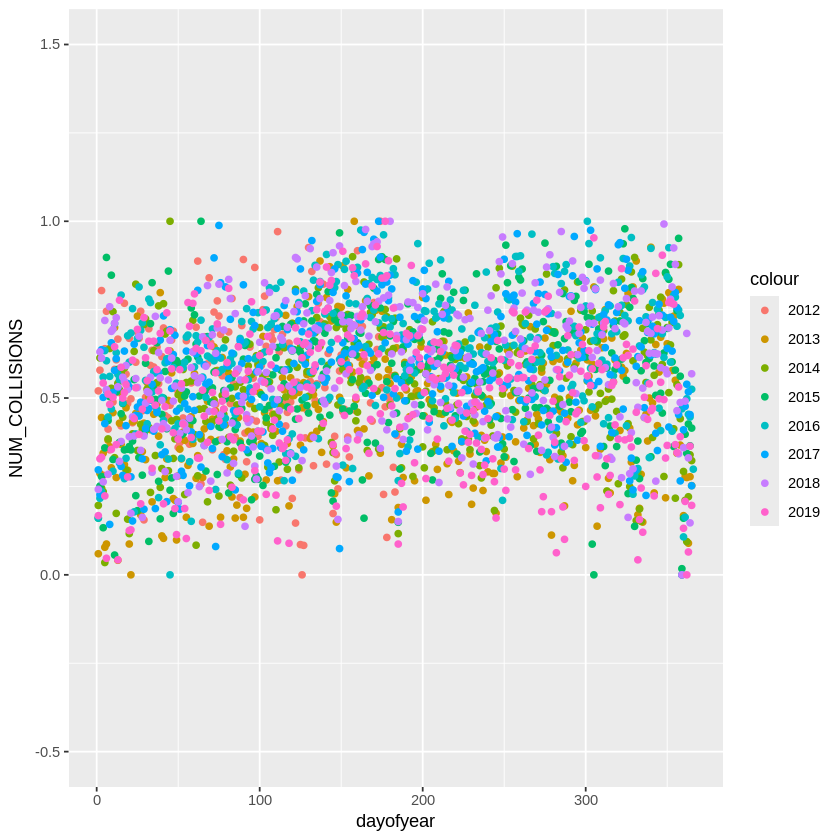

In [305]:
sp <- ggplot() +
  geom_point(data=ttcc2012c, aes(dayofyear, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ttcc2013c, aes(dayofyear, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ttcc2014c, aes(dayofyear, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ttcc2015c, aes(dayofyear, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ttcc2016c, aes(dayofyear, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ttcc2017c, aes(dayofyear, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ttcc2018c, aes(dayofyear, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ttcc2019c, aes(dayofyear, NUM_COLLISIONS, color="2019"))


sp+ylim(-0.5, 1.5)

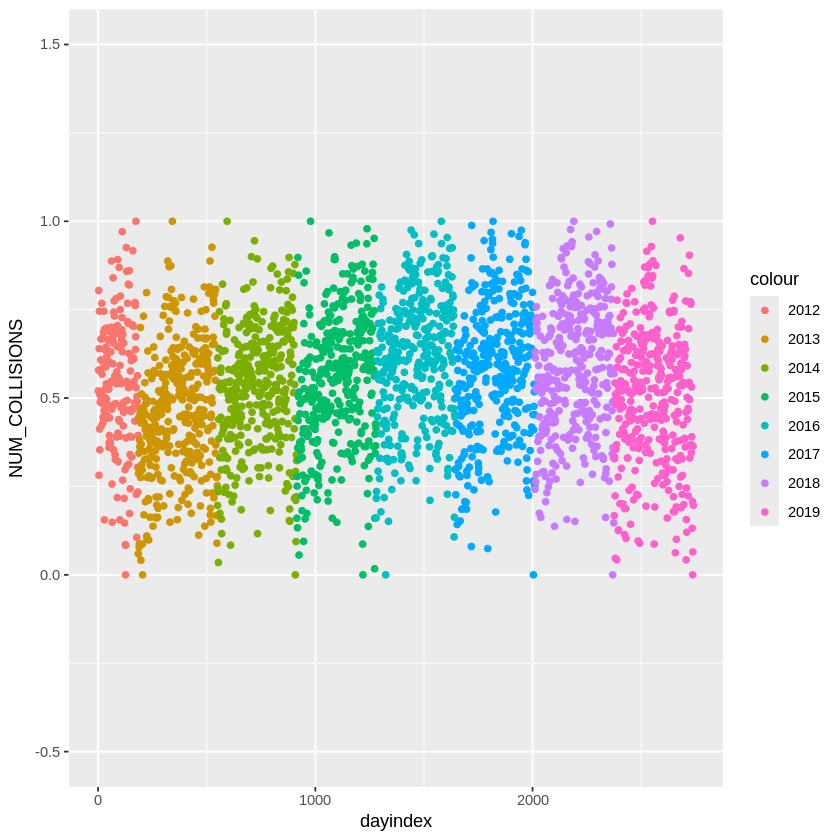

In [306]:
sp <- ggplot() +
  geom_point(data=ttcc2012c, aes(dayindex, NUM_COLLISIONS, color="2012")) +
  geom_point(data=ttcc2013c, aes(dayindex, NUM_COLLISIONS, color="2013")) +
  geom_point(data=ttcc2014c, aes(dayindex, NUM_COLLISIONS, color="2014")) +
  geom_point(data=ttcc2015c, aes(dayindex, NUM_COLLISIONS, color="2015")) +
  geom_point(data=ttcc2016c, aes(dayindex, NUM_COLLISIONS, color="2016")) +
  geom_point(data=ttcc2017c, aes(dayindex, NUM_COLLISIONS, color="2017")) +
  geom_point(data=ttcc2018c, aes(dayindex, NUM_COLLISIONS, color="2018")) +
  geom_point(data=ttcc2019c, aes(dayindex, NUM_COLLISIONS, color="2019"))


sp+ylim(-0.5, 1.5)

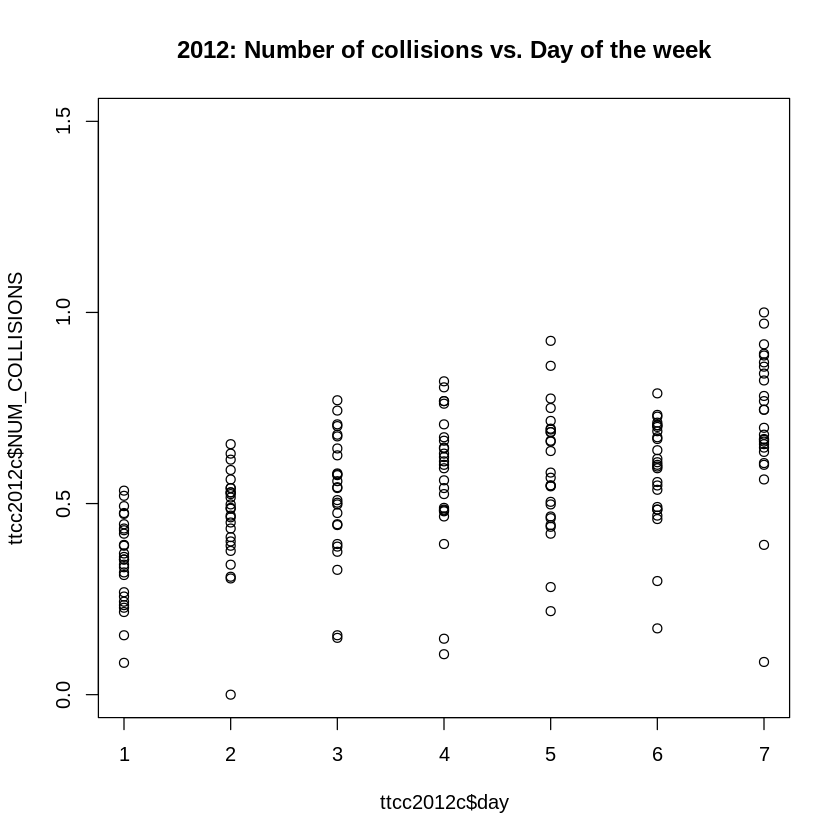

In [307]:
plot(ttcc2012c$day, ttcc2012c$NUM_COLLISIONS, main="2012: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [308]:
cor(ttcc2012c$day, ttcc2012c$NUM_COLLISIONS)

[1] 0.5464866

The correlation of 0.5465 signifies a moderate positive association between the day of the week and the number of collisions. This correlation value suggests that the day of the week is a meaningful factor in predicting collision frequency, though it is not a perfectly strong predictor. The trend implies that certain days are consistently associated with higher collision counts, likely linked to the behaviour and traffic volume differences.

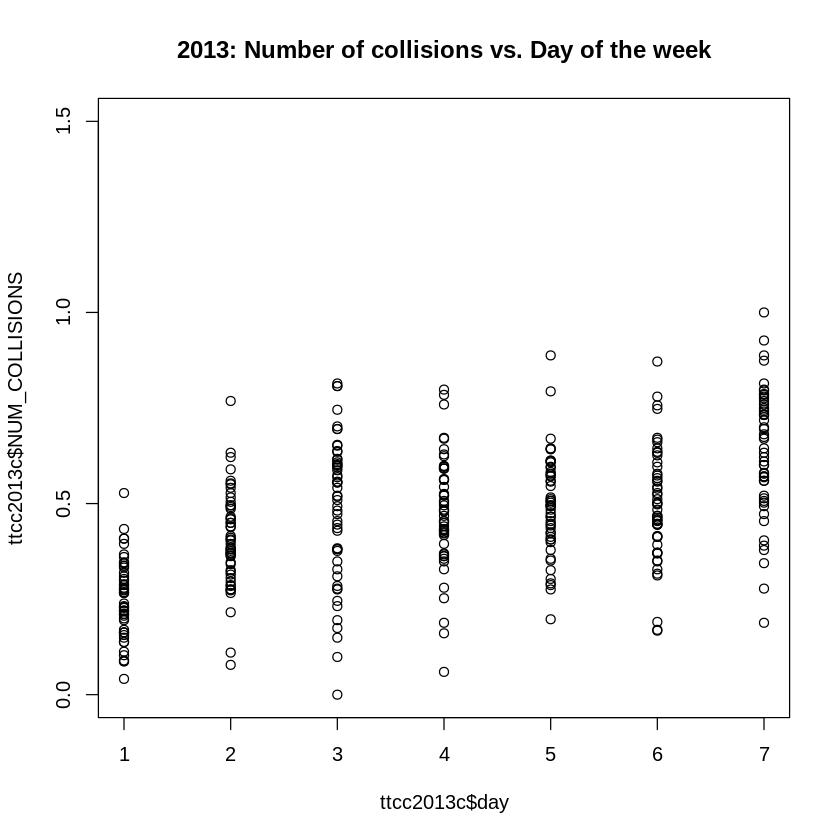

In [309]:
plot(ttcc2013c$day, ttcc2013c$NUM_COLLISIONS, main="2013: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [310]:
cor(ttcc2013c$day, ttcc2013c$NUM_COLLISIONS)

[1] 0.5315144

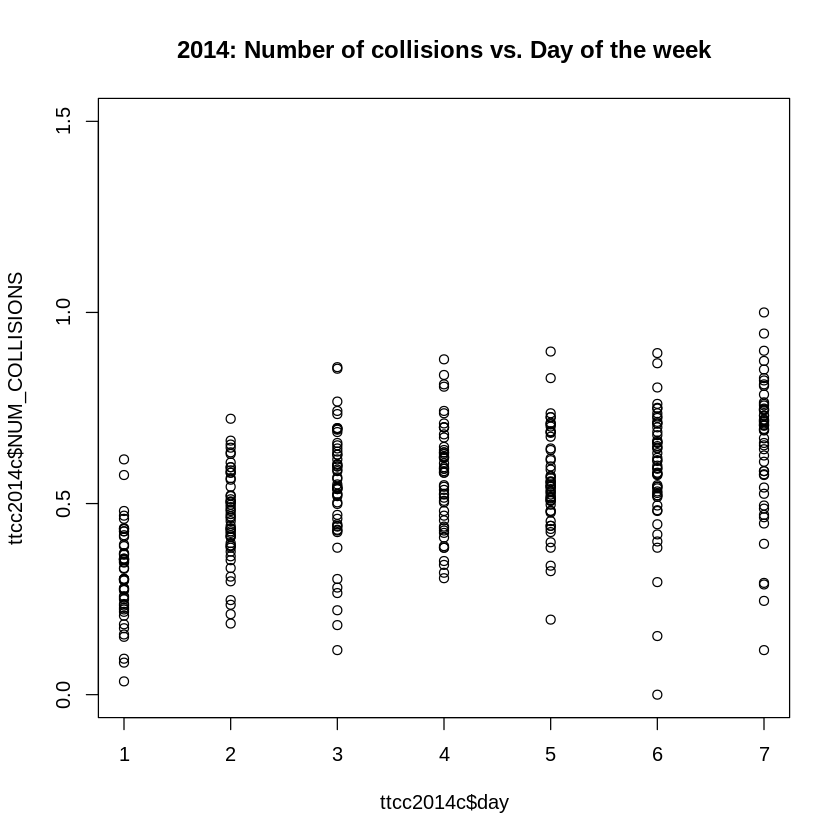

In [311]:
plot(ttcc2014c$day, ttcc2014c$NUM_COLLISIONS, main="2014: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [312]:
cor(ttcc2014c$day, ttcc2014c$NUM_COLLISIONS)

[1] 0.522752

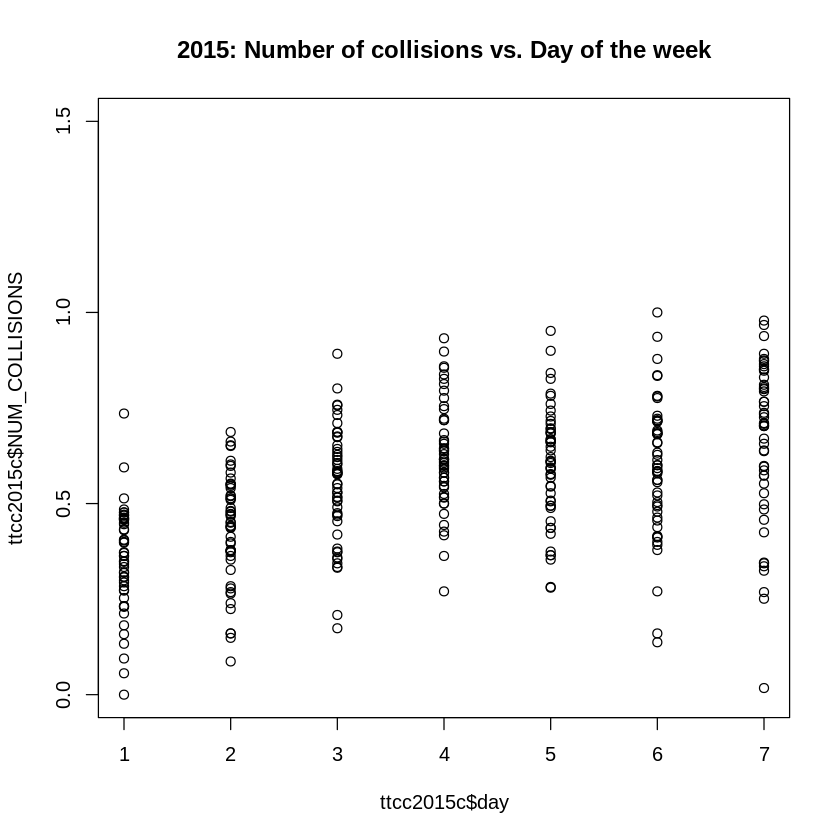

In [313]:
plot(ttcc2015c$day, ttcc2015c$NUM_COLLISIONS, main="2015: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [314]:
cor(ttcc2015c$day, ttcc2015c$NUM_COLLISIONS)

[1] 0.4908633

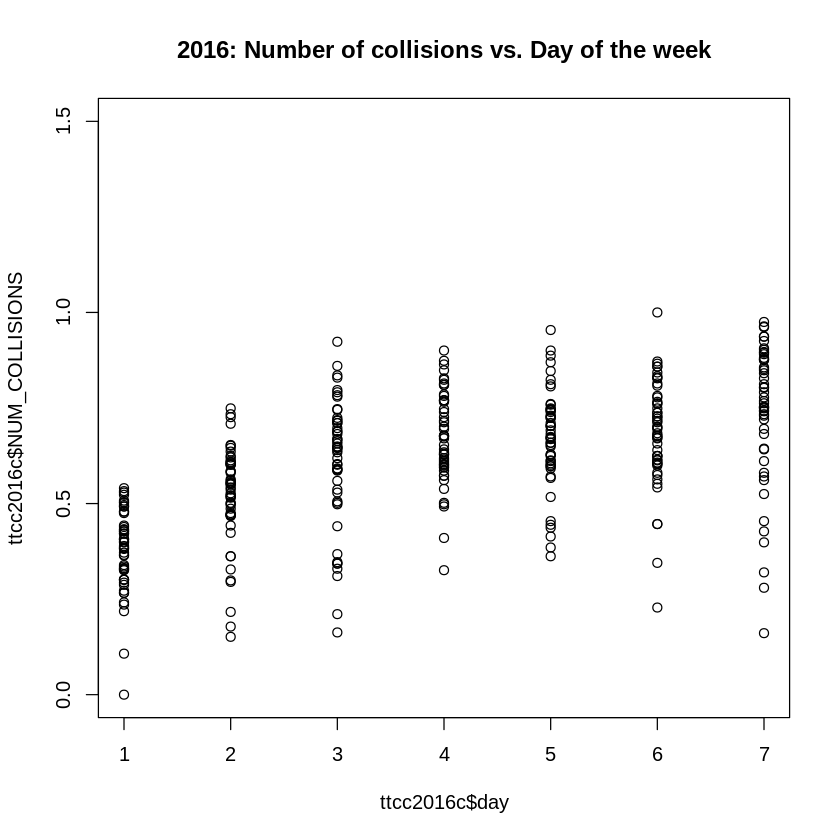

In [315]:
plot(ttcc2016c$day, ttcc2016c$NUM_COLLISIONS, main="2016: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [316]:
cor(ttcc2016c$day, ttcc2016c$NUM_COLLISIONS)

[1] 0.5788656

The correlation value of 0.5789 reveal that in 2016, there was a significant pattern of increased collisions as the week progressed. This suggests that the day of the week is an influential factor in collision counts, potentially driven by differences in driving patterns, traffic volume and social behaviour across weekdays and weekends.

The correlation value is high enough to consider the day of the week a significant factor in predicting collision frequency.

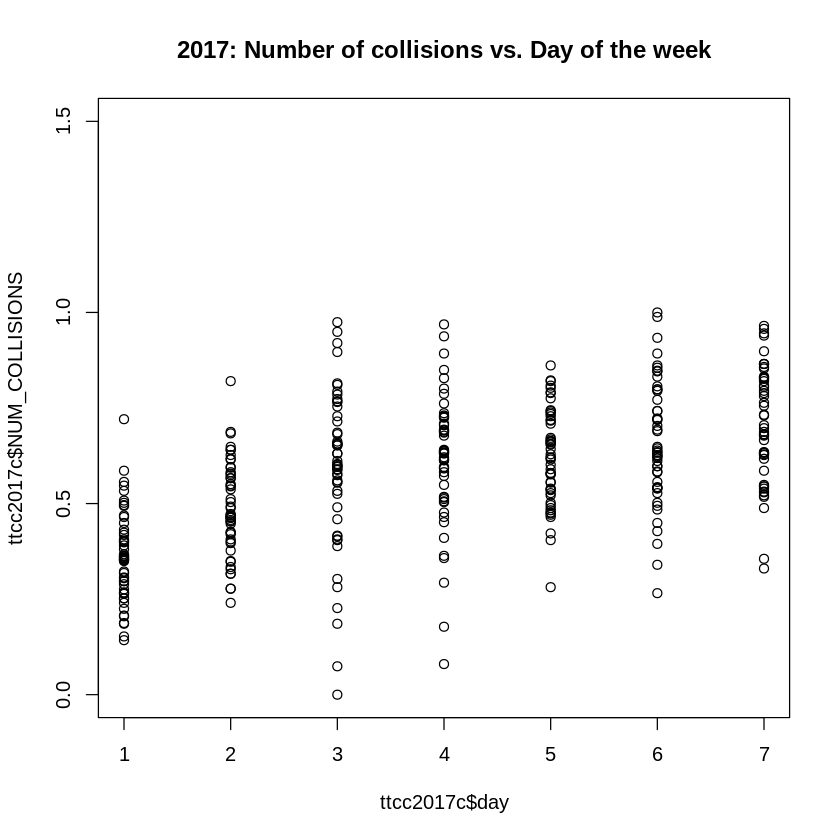

In [317]:
plot(ttcc2017c$day, ttcc2017c$NUM_COLLISIONS, main="2017: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [318]:
cor(ttcc2017c$day, ttcc2017c$NUM_COLLISIONS)

[1] 0.5416503

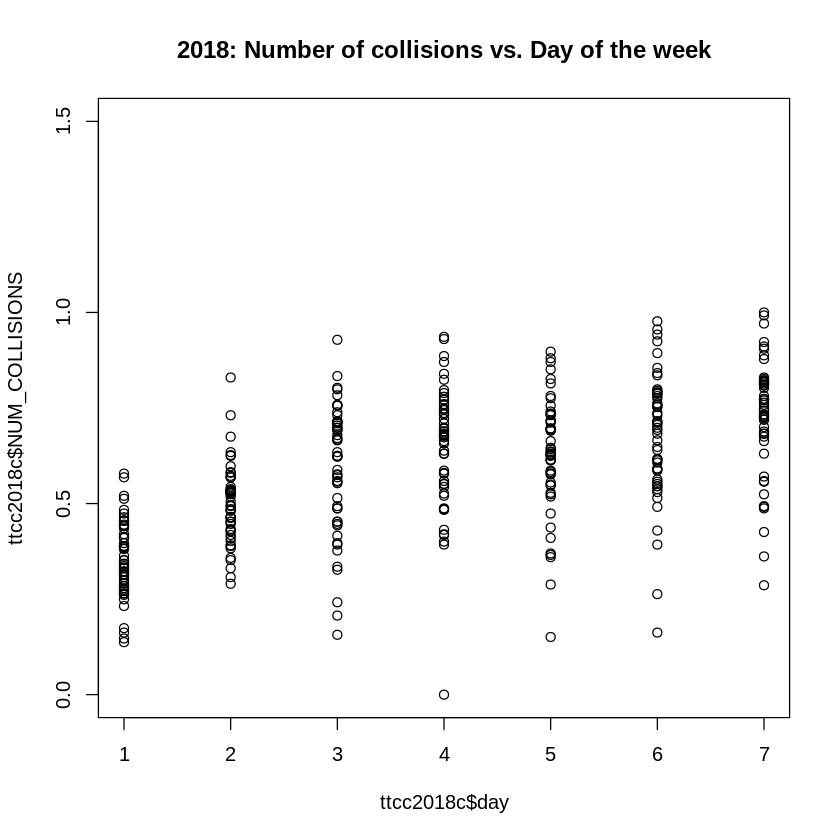

In [319]:
plot(ttcc2018c$day, ttcc2018c$NUM_COLLISIONS, main="2018: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [320]:
cor(ttcc2018c$day, ttcc2018c$NUM_COLLISIONS)

[1] 0.5767431

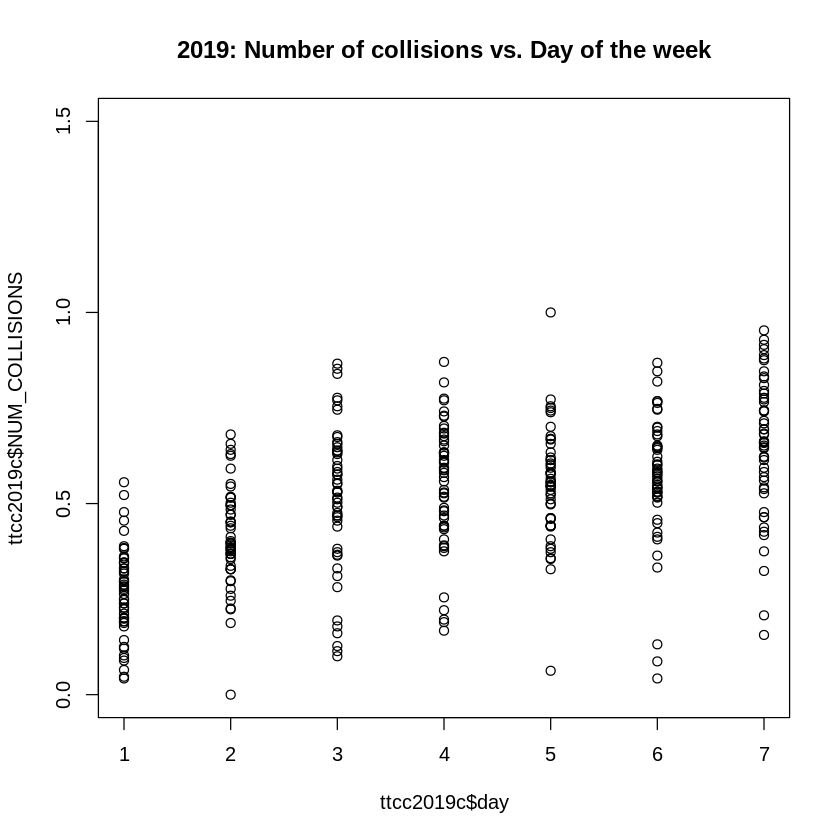

In [321]:
plot(ttcc2019c$day, ttcc2019c$NUM_COLLISIONS, main="2019: Number of collisions vs. Day of the week",  ylim=c(0,1.5))

In [322]:
cor(ttcc2019c$day, ttcc2019c$NUM_COLLISIONS)

[1] 0.549909

The correlation analysis across these years demonstrates a stable, moderate-to-strong positive relationship between the day of the week and the number of collisions, with collision counts tending to increase as the week progresses. This trend likely reflects increased travel and social activities across the week. The consistency of this pattern across multiple years suggests it is a dependable characteristic of collision data, making the day of the week a valuable factor to consider when predicting collision trends.

Let us put all the data together.

In [323]:
ttccsplitcheckcombined <- rbind(ttcc2012c, ttcc2013c, ttcc2014c, ttcc2015c, ttcc2016c, ttcc2017c, ttcc2018c, ttcc2019c)

In [324]:
ttccsplitcheckcombined

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,0.5202703
2,2,2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,0.5788288
3,3,3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,0.8040541
4,4,4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,0.2815315
5,5,5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,0.6396396
6,6,6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,0.7454955
7,7,7,2,2012,7,7,2012-07-07,84.9,65.9,1010.1,9.5,3.1,14.0,17.1,95.0,70.0,0.00,999.9,0,0.4121622
8,8,8,1,2012,7,8,2012-07-08,80.6,65.5,1010.1,8.5,3.1,8.0,15.9,90.0,70.0,0.59,999.9,0,0.3536036
9,9,9,3,2012,7,9,2012-07-09,78.5,56.8,1012.7,10.0,3.5,9.9,999.9,84.0,68.0,0.09,999.9,0,0.5090090


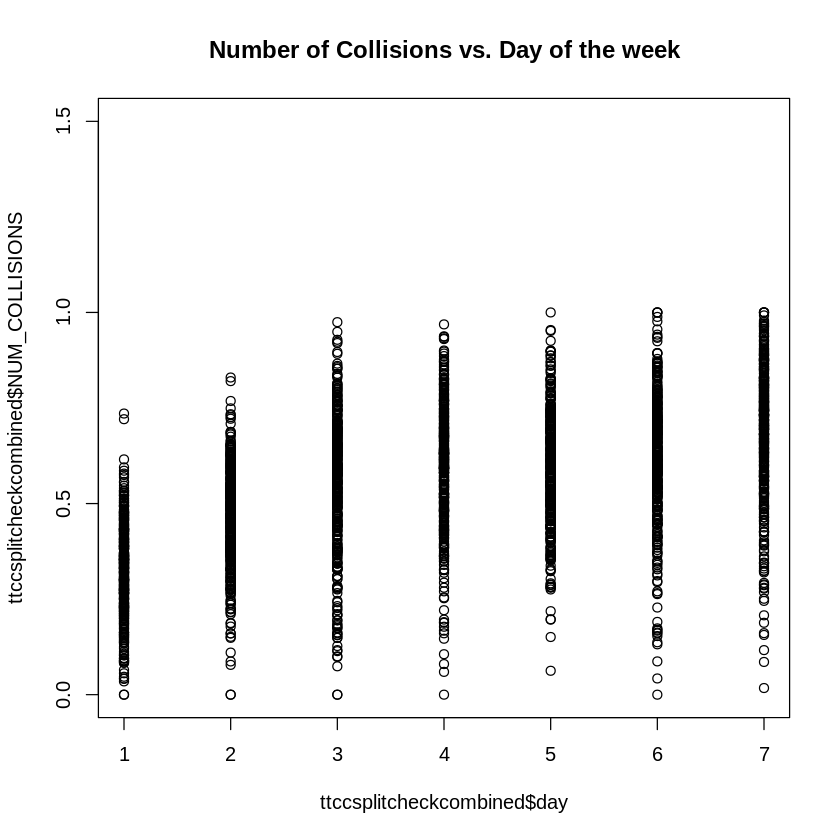

In [325]:
plot(ttccsplitcheckcombined$day, ttccsplitcheckcombined$NUM_COLLISIONS, main="Number of Collisions vs. Day of the week",  ylim=c(0,1.5))

In [326]:
cor(ttccsplitcheckcombined$day, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.5252567

In [327]:
cor(ttccsplitcheckcombined$temp, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2247427

In [328]:
cor(ttccsplitcheckcombined$min, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.202763

In [329]:
cor(ttccsplitcheckcombined$max, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2282247

In [330]:
cor(ttccsplitcheckcombined$prcp, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.02041534

In [331]:
cor(ttccsplitcheckcombined$dewp, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.2067351

In [332]:
cor(ttccsplitcheckcombined$fog, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.04251703

In [333]:
cor(ttccsplitcheckcombined$mxpsd, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] -0.009244327

In [334]:
cor(ttccsplitcheckcombined$visib, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] 0.01118456

In [335]:
cor(ttccsplitcheckcombined$wdsp, ttccsplitcheckcombined$NUM_COLLISIONS)

[1] -0.009106869

#AN OVERVIEW OF THE CORRELATION OF THE DIFFERENT VARIABLES IN THE DATASET

#Strongest Predictor:
The day of the week has the highest correlation with collision counts (0.5253), indicating that it is the most meaningful factor among the variables. This supports the notion that traffic patterns change throughout the week.

#Weak Predictors:
Temperature (both general, minimum, and maximum) shows weak positive correlations with collision counts, suggesting a minor influence. This could reflect increased outdoor activity and travel on warmer days, but temperature alone is not a major determinant of collision frequency.

The dew point shows a weak positive correlation of 0.2067 with collisions. Dew point reflects the amount of moisture in the air. While it has a minor association with collisions, it is not a strong predictor.

#Negligible Predictors:
Precipitation, fog, wind speed, maximum wind speed and visibility have very low correlations, indicating that these weather factors do not have a substantial impact on daily collision counts. This result may suggest that drivers adjust their behavior to compensate for adverse conditions or that these factors are not present in severe enough forms to significantly affect collision rates in the dataset.


In my observable opinion, the day of the week is the most significant factor affecting collision frequency, likely due to changes in travel behaviour and traffic volume across the week. Weather-related factors, such as temperature, dew point and precipitation, show weak or negligible correlations, implying limited direct impact on daily collision counts. This analysis suggests that while certain environmental conditions may slightly influence driving risk, behavioural patterns (as reflected in the day of the week) play a more substantial role in collision trends.

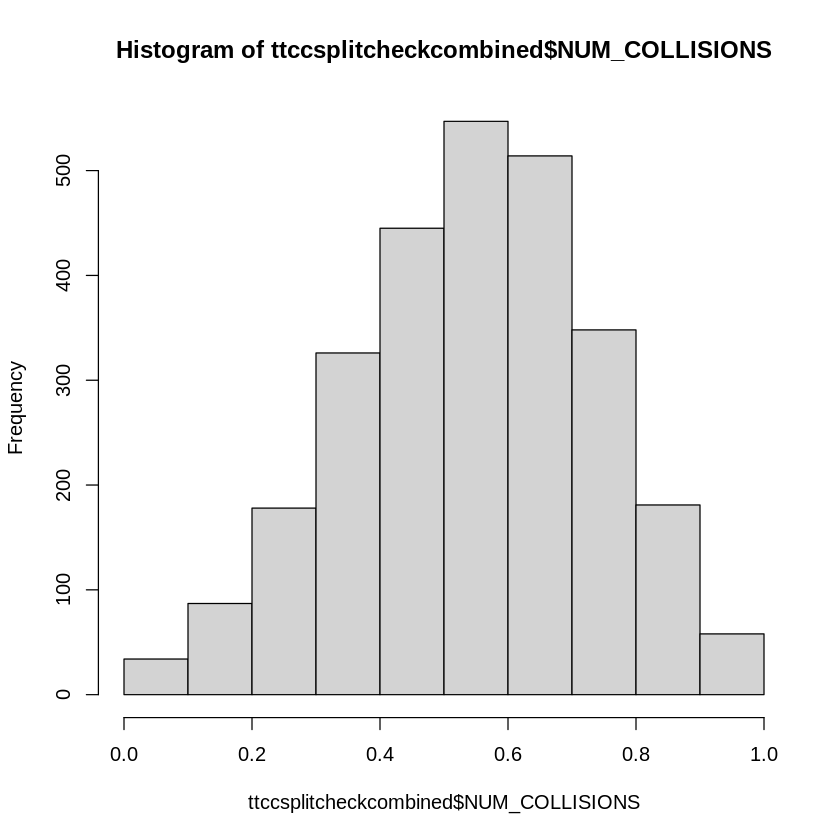

In [336]:
hist(ttccsplitcheckcombined$NUM_COLLISIONS, breaks =8)

This histogram suggests that the number of collisions tends to follow a near-normal distribution, with most days experiencing a moderate count of collisions and fewer days with very low or very high counts. This distribution can indicate that collisions are influenced by consistent daily factors, with occasional variability on days with higher or lower than average counts.

In [337]:
head(ttccsplitcheckcombined)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,0.5202703
2,2,2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,0.5788288
3,3,3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,0.8040541
4,4,4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,0.2815315
5,5,5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,0.6396396
6,6,6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,0.7454955


In [338]:
linearregressiondata <- ttccsplitcheckcombined[,c(3,8,9,20)]

In [339]:
head(linearregressiondata)

,day,temp,dewp,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>
1,1,83.6,63.0,0.5202703
2,3,80.3,54.1,0.5788288
3,4,79.8,56.7,0.8040541
4,5,81.8,65.6,0.2815315
5,6,86.7,64.3,0.6396396
6,7,81.9,62.3,0.7454955


In [358]:
write.csv(linearregressiondata,file="/content/linearregressiondata.csv")

In [359]:
ttccsplitcheckcombined2 <- ttccsplitcheckcombined

In [360]:
head(ttccsplitcheckcombined2)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,1,2012,7,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,0.5202703
2,2,2,3,2012,7,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,0.5788288
3,3,3,4,2012,7,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,0.8040541
4,4,4,5,2012,7,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,0.2815315
5,5,5,6,2012,7,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,0.6396396
6,6,6,7,2012,7,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,0.7454955


In [362]:
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 1] <- 'Jan'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 2] <- 'Feb'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 3] <- 'Mar'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 4] <- 'Apr'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 5] <- 'May'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 6] <- 'Jun'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 7] <- 'Jul'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 8] <- 'Aug'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 9] <- 'Sep'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 10] <- 'Oct'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 11] <- 'Nov'
ttccsplitcheckcombined2$mo[ttccsplitcheckcombined2$mo == 12] <- 'Dec'

In [363]:
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 1] <- 'Sun'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 2] <- 'Mon'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 3] <- 'Tue'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 4] <- 'Wed'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 5] <- 'Thu'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 6] <- 'Fri'
ttccsplitcheckcombined2$day[ttccsplitcheckcombined2$day == 7] <- 'Sat'

In [364]:
head(ttccsplitcheckcombined2)

,dayindex,dayofyear,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<dbl>,<dbl>,<chr>,<int>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,1,Sun,2012,Jul,1,2012-07-01,83.6,63.0,1008.9,9.7,4.1,9.9,18.1,93.0,66.0,0.00,999.9,0,0.5202703
2,2,2,Tue,2012,Jul,2,2012-07-02,80.3,54.1,1011.6,10.0,3.8,15.0,999.9,88.0,66.9,0.00,999.9,0,0.5788288
3,3,3,Wed,2012,Jul,3,2012-07-03,79.8,56.7,1012.8,10.0,2.9,12.0,999.9,88.0,63.0,0.00,999.9,0,0.8040541
4,4,4,Thu,2012,Jul,4,2012-07-04,81.8,65.6,1009.1,9.2,3.6,11.1,999.9,91.0,68.0,0.06,999.9,0,0.2815315
5,5,5,Fri,2012,Jul,5,2012-07-05,86.7,64.3,1007.4,9.4,3.8,15.0,999.9,93.9,70.0,99.99,999.9,0,0.6396396
6,6,6,Sat,2012,Jul,6,2012-07-06,81.9,62.3,1011.7,10.0,3.1,9.9,999.9,91.0,66.9,0.00,999.9,0,0.7454955


Applying one-hot encoding on both Month and day of the week.

In [365]:
months <- model.matrix(~0+ttccsplitcheckcombined2$mo)
head(months)

,ttccsplitcheckcombined2$moApr,ttccsplitcheckcombined2$moAug,ttccsplitcheckcombined2$moDec,ttccsplitcheckcombined2$moFeb,ttccsplitcheckcombined2$moJan,ttccsplitcheckcombined2$moJul,ttccsplitcheckcombined2$moJun,ttccsplitcheckcombined2$moMar,ttccsplitcheckcombined2$moMay,ttccsplitcheckcombined2$moNov,ttccsplitcheckcombined2$moOct,ttccsplitcheckcombined2$moSep
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0


In [366]:
colnames(months) <- c("Apr", "Aug", "Dec", "Feb", "Jan", "Jul", "Jun", "Mar", "May", "Nov", "Oct", "Sep")

In [367]:
head(months)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
1,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,1,0,0,0,0,0,0


In [368]:
daysofweek <- model.matrix(~0+ttccsplitcheckcombined2$day)
head(daysofweek)

,ttccsplitcheckcombined2$dayFri,ttccsplitcheckcombined2$dayMon,ttccsplitcheckcombined2$daySat,ttccsplitcheckcombined2$daySun,ttccsplitcheckcombined2$dayThu,ttccsplitcheckcombined2$dayTue,ttccsplitcheckcombined2$dayWed
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0


In [369]:
colnames(daysofweek) <- c("Fri", "Mon", "Sat", "Sun", "Thu", "Tue", "Wed")

In [370]:
head(daysofweek)

,Fri,Mon,Sat,Sun,Thu,Tue,Wed
1,0,0,0,1,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0


In [371]:
assignment2dnndata <- data.frame(months, daysofweek, ttccsplitcheckcombined2$year, ttccsplitcheckcombined2$temp, ttccsplitcheckcombined2$dewp, ttccsplitcheckcombined2$NUM_COLLISIONS)

In [372]:
head(assignment2dnndata)

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,⋯,Mon,Sat,Sun,Thu,Tue,Wed,ttccsplitcheckcombined2.year,ttccsplitcheckcombined2.temp,ttccsplitcheckcombined2.dewp,ttccsplitcheckcombined2.NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,1,0,0,0,0,⋯,0,0,1,0,0,0,2012,83.6,63.0,0.5202703
2,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,1,0,2012,80.3,54.1,0.5788288
3,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,1,2012,79.8,56.7,0.8040541
4,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,1,0,0,2012,81.8,65.6,0.2815315
5,0,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,2012,86.7,64.3,0.6396396
6,0,0,0,0,0,1,0,0,0,0,⋯,0,1,0,0,0,0,2012,81.9,62.3,0.7454955


In [373]:
# change names of other column names
colnames(assignment2dnndata)[which(names(assignment2dnndata) == "ttccsplitcheckcombined2.year")] <- "year"
colnames(assignment2dnndata)[which(names(assignment2dnndata) == "ttccsplitcheckcombined2.temp")] <- "temp"
colnames(assignment2dnndata)[which(names(assignment2dnndata) == "ttccsplitcheckcombined2.dewp")] <- "dewp"
colnames(assignment2dnndata)[which(names(assignment2dnndata) == "ttccsplitcheckcombined2.NUM_COLLISIONS")] <- "NUM_COLLISIONS"

In [374]:
summary(assignment2dnndata)

      Apr               Aug               Dec               Feb         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07689   Mean   :0.09124   Mean   :0.08977   Mean   :0.07174  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.00000   Max.   :1.00000  
      Jan               Jul               Jun               Mar         
 Min.   :0.00000   Min.   :0.00000   Min.   :0.00000   Min.   :0.00000  
 1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000   1st Qu.:0.00000  
 Median :0.00000   Median :0.00000   Median :0.00000   Median :0.00000  
 Mean   :0.07837   Mean   :0.09124   Mean   :0.07726   Mean   :0.07873  
 3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000   3rd Qu.:0.00000  
 Max.   :1.00000   Max.   :1.00000   Max.   :1.0000

In [376]:
write.csv(assignment2dnndata, file="/content/assignment2dnndata.csv")